# Проект: модель для прогноза оттока клиентов телекоммуникационной компании

Оператор связи «ТелеДом» хочет бороться с оттоком клиентов. Для этого его сотрудники начнут предлагать промокоды и специальные условия всем, кто планирует отказаться от услуг связи. Чтобы заранее находить таких пользователей, «ТелеДому» нужна модель, которая будет предсказывать, разорвёт ли абонент договор. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и услугах. Ваша задача — обучить на этих данных модель для прогноза оттока клиентов.

**Описание услуг**

Оператор предоставляет два основных типа услуг: 
- Стационарную телефонную связь. Телефон можно подключить к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line — «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

Клиенты могут платить за услуги каждый месяц или заключить договор на 1–2 года. Возможно оплатить счёт разными способами, а также получить электронный чек.

# Цель исследования

Обучить на полученных данных модель для прогноза оттока клиентов. Для подбора гиперпараметров модели и её тестирования необходимо использовать метрику ROC-AUC. Минимальный порог ROC-AUC >= 0.85.

После разработки модели необходима интерпретация её работы (ROC-кривая,матрица ошибок,важность признаков, дополнительная метрика accuracy).

# Описание данных

Данные состоят из нескольких файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Файл contract_new.csv

- customerID — идентификатор абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.

Файл personal_new.csv

- customerID — идентификатор пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.

Файл internet_new.csv

- customerID — идентификатор пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.

Файл phone_new.csv

- customerID — идентификатор пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

# Ход исследования

1. Загрузка данных.
Загрузим данные и выполним их первичный осмотр.
2. Исследовательский анализ и предобработка данных.
Выполним исследовательский анализ каждого датафрейма и при необходимости выполним предобработку. Сделаем выводы об имеющихся признаках: понадобятся ли они для обучения моделей.
3. Объединение данных.
Объединим выбранные признаки в один датафрейм по ключу.
4. Исследовательский анализ и предобработка данных объединённого датафрейма.
Выполним исследовательский анализ объединённого датафрейма, визуализируем распределения признаков и при необходимости выполним предобработку. Проведем корреляционный анализ.
5. Подготовка данных.
Выполним подготовку данных для обучения модели. Разделим данные на две выборки, при масштабировании и кодировании учтем особенности данных и моделей.
6. Обучение моделей машинного обучения.
Обучим как минимум две модели. Хотя бы для одной из них подберем как минимум два гиперпараметра.
7. Выбор лучшей модели.
Выберим лучшую модель и проверим её качество на тестовой выборке.
8. Общий вывод и рекомендации заказчику.
Сделаем общий вывод о проделанной работе: опишим основные этапы работы, полученные результаты и дадим рекомендации для бизнеса.

# Загрузка библиотек

In [6]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import re
import copy
import time

from matplotlib import pyplot as plt
from matplotlib import rcParams, rcParamsDefault
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from lineartree import LinearForestClassifier
from catboost import Pool, CatBoostClassifier
from sklearn.dummy import DummyClassifier

from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler, MinMaxScaler, LabelEncoder, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, f_classif, mutual_info_classif, VarianceThreshold
from sklearn.inspection import permutation_importance
from sklearn.datasets import make_classification

from sklearn.metrics import (
    roc_auc_score, f1_score, 
    mean_squared_error, 
    r2_score, mean_absolute_error, 
    accuracy_score, confusion_matrix, 
    recall_score, precision_score, 
    precision_recall_curve,
    make_scorer, roc_curve, 
    classification_report, 
    RocCurveDisplay, 
    ConfusionMatrixDisplay
)

from sklearn.pipeline import Pipeline

#from skimpy import clean_columns

import shap

import phik

In [7]:
# отображение всех колонок при выводе на печать
pd.set_option('display.max_columns', None)

In [8]:
# для настройки среды визуализации
rcParams['figure.figsize'] = 10, 6
%config InlineBackend.figure_format = 'svg'
# дополнительно для графиков
factor = .8
default_dpi = rcParamsDefault['figure.dpi']
rcParams['figure.dpi'] = default_dpi * factor

In [9]:
# зафиксируем константы:
RANDOM_STATE = 22072024
TEST_SIZE = .25

## Загрузка данных

In [11]:
try:
    df_contract = pd.read_csv('/datasets/contract_new.csv') 
    df_personal = pd.read_csv('/datasets/personal_new.csv') 
    df_internet = pd.read_csv('/datasets/internet_new.csv')
    df_phone = pd.read_csv('/datasets/phone_new.csv')
except:
    df_contract = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv') 
    df_personal = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv') 
    df_internet = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv')
    df_phone = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv')

In [12]:
# Для предварительного изучения данных, напишем функцию:
def df_info(df):
    df.info()
    print('*'*120)
    display(df.describe())
    print('*'*120)
    print('Количество явных дубликатов:', df.duplicated().sum())
    print('*'*120)
    display(df.head())

In [13]:
df_info(df_contract)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   BeginDate         7043 non-null   object 
 2   EndDate           7043 non-null   object 
 3   Type              7043 non-null   object 
 4   PaperlessBilling  7043 non-null   object 
 5   PaymentMethod     7043 non-null   object 
 6   MonthlyCharges    7043 non-null   float64
 7   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(7)
memory usage: 440.3+ KB
************************************************************************************************************************


,MonthlyCharges
count,7043.000000
mean,64.761692
std,30.090047
min,18.250000
25%,35.500000
50%,70.350000
75%,89.850000
max,118.750000


************************************************************************************************************************
Количество явных дубликатов: 0
************************************************************************************************************************


,customerID,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
1,5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
2,3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
3,7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
4,9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5


In [14]:
df_info(df_personal)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     7043 non-null   object
 1   gender         7043 non-null   object
 2   SeniorCitizen  7043 non-null   int64 
 3   Partner        7043 non-null   object
 4   Dependents     7043 non-null   object
dtypes: int64(1), object(4)
memory usage: 275.2+ KB
************************************************************************************************************************


,SeniorCitizen
count,7043.000000
mean,0.162147
std,0.368612
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


************************************************************************************************************************
Количество явных дубликатов: 0
************************************************************************************************************************


,customerID,gender,SeniorCitizen,Partner,Dependents
0,7590-VHVEG,Female,0,Yes,No
1,5575-GNVDE,Male,0,No,No
2,3668-QPYBK,Male,0,No,No
3,7795-CFOCW,Male,0,No,No
4,9237-HQITU,Female,0,No,No


In [15]:
df_info(df_internet)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5517 entries, 0 to 5516
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        5517 non-null   object
 1   InternetService   5517 non-null   object
 2   OnlineSecurity    5517 non-null   object
 3   OnlineBackup      5517 non-null   object
 4   DeviceProtection  5517 non-null   object
 5   TechSupport       5517 non-null   object
 6   StreamingTV       5517 non-null   object
 7   StreamingMovies   5517 non-null   object
dtypes: object(8)
memory usage: 344.9+ KB
************************************************************************************************************************


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
count,5517,5517,5517,5517,5517,5517,5517,5517
unique,5517,2,2,2,2,2,2,2
top,7590-VHVEG,Fiber optic,No,No,No,No,No,No
freq,1,3096,3498,3088,3095,3473,2810,2785


************************************************************************************************************************
Количество явных дубликатов: 0
************************************************************************************************************************


,customerID,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
0,7590-VHVEG,DSL,No,Yes,No,No,No,No
1,5575-GNVDE,DSL,Yes,No,Yes,No,No,No
2,3668-QPYBK,DSL,Yes,Yes,No,No,No,No
3,7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
4,9237-HQITU,Fiber optic,No,No,No,No,No,No


In [16]:
df_info(df_phone)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6361 entries, 0 to 6360
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   customerID     6361 non-null   object
 1   MultipleLines  6361 non-null   object
dtypes: object(2)
memory usage: 99.5+ KB
************************************************************************************************************************


,customerID,MultipleLines
count,6361,6361
unique,6361,2
top,5575-GNVDE,No
freq,1,3390


************************************************************************************************************************
Количество явных дубликатов: 0
************************************************************************************************************************


,customerID,MultipleLines
0,5575-GNVDE,No
1,3668-QPYBK,No
2,9237-HQITU,No
3,9305-CDSKC,Yes
4,1452-KIOVK,Yes


### Вывод по итогам загрузки данных

- Датафрейм `df_contract`:
    - датафрейм содержит 8 столбцов и 7043 строки;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных дубликатов нет, могут присутствовать неявные дубликаты - проверим их в шаге 2;
    - на первый взгляд, нарушен тип данных в столбцах `BeginDate` и `TotalCharges`, возможно и в `EndDate`. Скорее всего связано с наполнением - рассмотрим в шаге 2, изменим при необходимости;
    - признак `EndDate` подходит под определение целевого в нашей задаче, однако в таком виде он не подойдет, скорее всего необходимо будет создать новый признак - рассмотрим во 2 шаге;
- Датафрейм `df_personal`:
    - датафрейм содержит 5 столбцов и 7043 строки;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных дубликатов нет, могут присутствовать неявные дубликаты - проверим их в шаге 2;
    - тип данных, на первый взгляд, соответствует наполнению, изменение не требуется, за исключением столбца SeniorCitizen - он имеет числовой тип, хотя фактически является категориальным. На этапе анализа для удобства построения диаграмм его лучше преобразовать по аналогии с другими столбцами в строки 'Yes'/'No';
- Датафрейм `df_internet`:
    - датафрейм содержит 8 столбцов и 5517 строк - видимо, не все клиенты используют интернет;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных и неявных дубликатов нет;
    - тип данных, на первый взгляд, соответствует наполнению, изменение не требуется;
- Датафрейм `df_phone`:
    - датафрейм содержит 2 столбца и 6361 строку - видимо, не все клиенты используют телефонную связь;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных и неявных дубликатов нет;
    - тип данных, на первый взгляд, соответствует наполнению, изменение не требуется.

## Исследовательский анализ и предобработка данных

Дляя начала, приведем названия столбцов во всех датафреймах к "змеиному" стилю:

In [20]:
# Для удобства создадим функцию:
def to_snake_case(column_name):
    return re.sub(r'([a-z])([A-Z])', r'\1_\2', column_name).lower()

In [21]:
dataframes = [df_contract, df_personal, df_internet, df_phone]

In [22]:
for i, df in enumerate(dataframes):
    df.columns = [to_snake_case(col) for col in df.columns]

In [23]:
display(df_contract.sample(5))
print('*'*120)
display(df_personal.sample(5))
print('*'*120)
display(df_internet.sample(5))
print('*'*120)
df_phone.sample(5)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
296,6556-DBKZF,2014-03-01,No,Two year,No,Electronic check,76.05,5399.55
6550,1309-BXVOQ,2018-04-01,No,Month-to-month,Yes,Electronic check,106.10,2334.2
1676,0793-TWELN,2019-10-01,No,Month-to-month,Yes,Electronic check,80.15,339.84
1309,7831-QGOXH,2018-04-01,2019-07-01,Month-to-month,Yes,Electronic check,85.20,1278.0
3508,2368-GAKKQ,2014-04-01,No,Two year,Yes,Bank transfer (automatic),113.65,8751.05


************************************************************************************************************************


,customer_id,gender,senior_citizen,partner,dependents
4147,3836-FZSDJ,Male,1,Yes,No
1184,4660-IRIBM,Male,0,Yes,Yes
2871,7508-MYBOG,Male,0,Yes,No
3259,9620-ENEJV,Female,0,No,No
2649,3027-YNWZU,Female,0,Yes,No


************************************************************************************************************************


,customer_id,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
2232,1897-OKVMW,DSL,Yes,Yes,Yes,Yes,Yes,Yes
4193,4724-WXVWF,Fiber optic,Yes,No,No,Yes,No,Yes
3033,2898-LSJGD,DSL,Yes,No,Yes,No,Yes,Yes
756,7567-ECMCM,Fiber optic,No,No,No,No,No,Yes
5136,2188-SXWVT,DSL,Yes,Yes,No,No,No,No


************************************************************************************************************************


,customer_id,multiple_lines
2272,1032-MAELW,Yes
1448,8246-SHFGA,No
2786,1666-JXLKU,Yes
5244,4291-TPNFG,Yes
3510,0237-YFUTL,Yes


Проверим категориальные столбцы датафреймов на скрытые дубликаты, описки, орфографические ошибки.

In [25]:
# для удобства, напишем функцию:
def double_search(df, column):
    display(df[column].value_counts().sort_index())
    print('*'*120)
    display(df[column].unique())

### Исследовательский анализ и предобработка данных датафрейма **df_contract**

In [27]:
double_search(df_contract, 'customer_id')

0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

************************************************************************************************************************


array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

Так как столбец `customer_id` содержит id пользователей, проверим их на уникальность:

In [29]:
len(df_contract['customer_id'].unique())

7043

In [30]:
double_search(df_contract, 'begin_date')

2013-10-01      3
2013-11-01      2
2013-12-01      3
2014-01-01      7
2014-02-01    366
             ... 
2019-10-01    237
2019-11-01    237
2019-12-01    220
2020-01-01    233
2020-02-01     11
Name: begin_date, Length: 77, dtype: int64

************************************************************************************************************************


array(['2020-01-01', '2017-04-01', '2019-10-01', '2016-05-01',
       '2019-09-01', '2019-03-01', '2018-04-01', '2019-04-01',
       '2017-07-01', '2014-12-01', '2019-01-01', '2018-10-01',
       '2015-04-01', '2015-09-01', '2018-01-01', '2014-05-01',
       '2015-10-01', '2014-03-01', '2018-05-01', '2019-11-01',
       '2019-02-01', '2016-01-01', '2017-08-01', '2015-12-01',
       '2014-02-01', '2018-06-01', '2019-12-01', '2017-11-01',
       '2019-06-01', '2016-04-01', '2017-02-01', '2018-12-01',
       '2014-04-01', '2018-09-01', '2014-11-01', '2016-07-01',
       '2015-02-01', '2018-07-01', '2014-08-01', '2016-03-01',
       '2018-08-01', '2014-10-01', '2015-06-01', '2016-08-01',
       '2019-05-01', '2017-03-01', '2016-02-01', '2017-09-01',
       '2014-09-01', '2017-12-01', '2016-12-01', '2017-06-01',
       '2015-05-01', '2016-10-01', '2016-09-01', '2019-08-01',
       '2019-07-01', '2017-05-01', '2017-10-01', '2014-07-01',
       '2018-03-01', '2015-01-01', '2018-11-01', '2015-

In [31]:
double_search(df_contract, 'end_date')

2014-06-01       1
2014-09-01       2
2014-10-01       1
2014-11-01       1
2014-12-01       2
              ... 
2019-10-01      31
2019-11-01      30
2019-12-01      38
2020-01-01      39
No            5942
Name: end_date, Length: 67, dtype: int64

************************************************************************************************************************


array(['No', '2017-05-01', '2016-03-01', '2018-09-01', '2018-11-01',
       '2018-12-01', '2019-08-01', '2018-07-01', '2017-09-01',
       '2015-09-01', '2016-07-01', '2016-06-01', '2018-03-01',
       '2019-02-01', '2018-06-01', '2019-06-01', '2020-01-01',
       '2019-11-01', '2016-09-01', '2015-06-01', '2016-12-01',
       '2019-05-01', '2019-04-01', '2017-06-01', '2017-08-01',
       '2018-04-01', '2018-08-01', '2018-02-01', '2019-07-01',
       '2015-12-01', '2014-06-01', '2018-10-01', '2019-01-01',
       '2017-07-01', '2017-12-01', '2018-05-01', '2015-11-01',
       '2019-10-01', '2019-03-01', '2016-02-01', '2016-10-01',
       '2018-01-01', '2017-11-01', '2015-10-01', '2019-12-01',
       '2015-07-01', '2017-04-01', '2015-02-01', '2017-03-01',
       '2016-05-01', '2016-11-01', '2015-08-01', '2019-09-01',
       '2017-10-01', '2017-02-01', '2016-08-01', '2016-04-01',
       '2015-05-01', '2014-09-01', '2014-10-01', '2017-01-01',
       '2015-03-01', '2015-01-01', '2016-01-01', 

In [32]:
double_search(df_contract, 'type')

Month-to-month    3875
One year          1473
Two year          1695
Name: type, dtype: int64

************************************************************************************************************************


array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [33]:
double_search(df_contract, 'paperless_billing')

No     2872
Yes    4171
Name: paperless_billing, dtype: int64

************************************************************************************************************************


array(['Yes', 'No'], dtype=object)

In [34]:
double_search(df_contract, 'payment_method')

Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: payment_method, dtype: int64

************************************************************************************************************************


array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [35]:
double_search(df_contract, 'monthly_charges')

18.25     1
18.40     1
18.55     1
18.70     2
18.75     1
         ..
118.20    1
118.35    1
118.60    2
118.65    1
118.75    1
Name: monthly_charges, Length: 1585, dtype: int64

************************************************************************************************************************


array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [36]:
double_search(df_contract, 'total_charges')

          11
100.17     1
100.19     1
100.2      1
100.24     1
          ..
997.05     1
997.78     1
998.89     1
999.6      2
999.9      1
Name: total_charges, Length: 6658, dtype: int64

************************************************************************************************************************


array(['31.04', '2071.84', '226.17', ..., '325.6', '520.8', '7251.82'],
      dtype=object)

Столбец `total_charges` имеет 11 значений, в которых вставлен пробел, возможно, там еще не было оплат, проверим как эти значения коррелируются с другими столбцами, особенно с `begin_date`, `end_date` и `monthly_charges`:

In [38]:
df_contract.query('total_charges == " "')

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges
488,4472-LVYGI,2020-02-01,No,Two year,Yes,Bank transfer (automatic),52.55,
753,3115-CZMZD,2020-02-01,No,Two year,No,Mailed check,20.25,
936,5709-LVOEQ,2020-02-01,No,Two year,No,Mailed check,80.85,
1082,4367-NUYAO,2020-02-01,No,Two year,No,Mailed check,25.75,
1340,1371-DWPAZ,2020-02-01,No,Two year,No,Credit card (automatic),56.05,
3331,7644-OMVMY,2020-02-01,No,Two year,No,Mailed check,19.85,
3826,3213-VVOLG,2020-02-01,No,Two year,No,Mailed check,25.35,
4380,2520-SGTTA,2020-02-01,No,Two year,No,Mailed check,20.00,
5218,2923-ARZLG,2020-02-01,No,One year,Yes,Mailed check,19.70,
6670,4075-WKNIU,2020-02-01,No,Two year,No,Mailed check,73.35,


**Предварительные выводы по датафрейму `df_contract`**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим этот вопрос после анализа остальных датафреймов;
- Столбец `begin_date` содержит дату начала контракта, однако формат данных не верный - переведем в формат data - потребуется для формирования нового признака - длительность контракта. Возможно признак `begin_date` не понадобится для обучения модели - вывод сделаем в 4 шаге;
- Столбец `end_date` содержит дату окончания контракта и значение "No", означающее, что на дату выгрузки (01 февраля 2020) контракт действует. На основе этого столбца сформируем наш целевой признак - признак активного контракта, где "0" будет означать, что контракт действует (значение "No" в признаке `end_date`), а "1" - контракт закрыт (значение даты в признаке `end_date`). Также, переведем в фармат data - потребуется для формирования нового признака - длительность контракта, где значение "No" заменим на дату выгрузки 2020-02-01. Возможно признак `begin_date` не понадобится для обучения модели - вывод сделаем в 4 шаге;
- Столбец `type` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `paperless_billing` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `payment_method` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `monthly_charges` - содержит числовые значения, тип данных верный, явных ошибок в данных не обнаружено. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `total_charges` - обнаружены пробелы вместо числовых данных, соглано выгрузке - это клиенты, у которых только начался контракт (дата начала - 2020-02-01) - у них есть оплата в этом месяце, но общая сумма затрат еще не подсчитана, соответственно, заменим пробелы на уже существующие месячные оплаты и переведем тип данных всего столбца в числовое значение. Признак, с большой вероятностью, необходим в обучении модели.

In [40]:
# Заменим тип данных в столбце `begin_date`:
df_contract['begin_date'] = pd.to_datetime(df_contract['begin_date'], format='%Y-%m-%d')

Прежде чем заменять тип данных и значения "No" в признаке `end_date`, создадим наш целевой признак `deactive_contract`:

In [42]:
df_contract['deactive_contract'] = np.where(df_contract['end_date'] == 'No', 0, 1)
df_contract.sample(10)

,customer_id,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,deactive_contract
1772,7198-GLXTC,2019-09-01,No,Month-to-month,No,Electronic check,79.00,395.0,0
6623,9248-OJYKK,2019-09-01,No,Month-to-month,Yes,Electronic check,76.45,382.25,0
5375,9637-EIHEQ,2019-09-01,No,Month-to-month,Yes,Electronic check,50.80,254.0,0
3337,0840-DFEZH,2019-07-01,No,Month-to-month,Yes,Electronic check,75.35,527.45,0
2713,5996-DAOQL,2020-01-01,No,Month-to-month,Yes,Mailed check,20.45,21.47,0
3366,1855-AGAWH,2017-07-01,No,One year,Yes,Electronic check,93.80,3082.27,0
5836,2862-JVEOY,2019-08-01,No,One year,No,Mailed check,19.15,119.5,0
2111,3373-DIUUN,2017-08-01,No,Two year,No,Mailed check,21.25,637.5,0
3005,0516-QREYC,2018-02-01,No,Month-to-month,Yes,Mailed check,20.30,506.69,0
1100,9578-FOMUK,2018-11-01,No,Month-to-month,Yes,Electronic check,24.80,386.88,0


In [43]:
# Заменим значение "No" на "2020-02-01" и тип данных в столбце `end_date`:
df_contract['end_date'] = np.where(df_contract['end_date'] == 'No', '2020-02-01', df_contract['end_date'])
df_contract['end_date'] = pd.to_datetime(df_contract['end_date'], format='%Y-%m-%d')

In [44]:
# Создадим признак длительность контракта `duration_contract`:
df_contract['duration_contract'] = (df_contract['end_date'] - df_contract['begin_date']).dt.components.days

In [45]:
# Заменим пробелы в признаке `total_charges` на значения из признака `monthly_charges` и изменим тип данных:
df_contract['total_charges'] = np.where(df_contract['total_charges'] == ' ', 
                                        df_contract['monthly_charges'], 
                                        df_contract['total_charges'])
df_contract['total_charges'] = df_contract['total_charges'].astype('float64')

Так как всю полезную информацию из признаков `begin_date` и `end_date` мы извлекли, путем создания новых признаков и признаки в формате даты нам больше не нужны, удалим эти столбцы:

In [47]:
df_contract = df_contract.drop(['begin_date', 'end_date'], axis=1)

In [48]:
display(df_contract.info())
print('*'*120)
df_contract.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   customer_id        7043 non-null   object 
 1   type               7043 non-null   object 
 2   paperless_billing  7043 non-null   object 
 3   payment_method     7043 non-null   object 
 4   monthly_charges    7043 non-null   float64
 5   total_charges      7043 non-null   float64
 6   deactive_contract  7043 non-null   int32  
 7   duration_contract  7043 non-null   int64  
dtypes: float64(2), int32(1), int64(1), object(4)
memory usage: 412.8+ KB


None

************************************************************************************************************************


,customer_id,type,paperless_billing,payment_method,monthly_charges,total_charges,deactive_contract,duration_contract
0,7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,31.04,0,31
1,5575-GNVDE,One year,No,Mailed check,56.95,2071.84,0,1036
2,3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,226.17,0,123
3,7795-CFOCW,One year,No,Bank transfer (automatic),42.30,1960.60,0,1371
4,9237-HQITU,Month-to-month,Yes,Electronic check,70.70,353.50,0,153


### Исследовательский анализ и предобработка данных датафрейма **df_personal**

In [50]:
double_search(df_personal, 'customer_id')

0002-ORFBO    1
0003-MKNFE    1
0004-TLHLJ    1
0011-IGKFF    1
0013-EXCHZ    1
             ..
9987-LUTYD    1
9992-RRAMN    1
9992-UJOEL    1
9993-LHIEB    1
9995-HOTOH    1
Name: customer_id, Length: 7043, dtype: int64

************************************************************************************************************************


array(['7590-VHVEG', '5575-GNVDE', '3668-QPYBK', ..., '4801-JZAZL',
       '8361-LTMKD', '3186-AJIEK'], dtype=object)

Так как столбец customer_id содержит id пользователей, проверим их на уникальность:

In [52]:
len(df_personal['customer_id'].unique())

7043

In [53]:
double_search(df_personal, 'gender')

Female    3488
Male      3555
Name: gender, dtype: int64

************************************************************************************************************************


array(['Female', 'Male'], dtype=object)

In [54]:
double_search(df_personal, 'senior_citizen')

0    5901
1    1142
Name: senior_citizen, dtype: int64

************************************************************************************************************************


array([0, 1], dtype=int64)

In [55]:
double_search(df_personal, 'partner')

No     3641
Yes    3402
Name: partner, dtype: int64

************************************************************************************************************************


array(['Yes', 'No'], dtype=object)

In [56]:
double_search(df_personal, 'dependents')

No     4933
Yes    2110
Name: dependents, dtype: int64

************************************************************************************************************************


array(['No', 'Yes'], dtype=object)

**Предварительные выводы по датафрейму `df_personal`**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим этот вопрос после анализа остальных датафреймов;
- Столбец `gender` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `senior_citizen` - бинарный категориальный признак, дубликатов, описок не выявлено. Отличается от других признаков числовыми значениями, с целью приведения данных к унифицированной форме, переведем значения 0 и 1 к "No" и "Yes" соответственно. Перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `partner` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `dependents` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.

In [58]:
df_personal['senior_citizen'] = np.where(df_personal['senior_citizen'] == 0, 'No', 'Yes')

In [59]:
display(df_personal.info())
print('*'*120)
df_personal.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   customer_id     7043 non-null   object
 1   gender          7043 non-null   object
 2   senior_citizen  7043 non-null   object
 3   partner         7043 non-null   object
 4   dependents      7043 non-null   object
dtypes: object(5)
memory usage: 275.2+ KB


None

************************************************************************************************************************


,customer_id,gender,senior_citizen,partner,dependents
0,7590-VHVEG,Female,No,Yes,No
1,5575-GNVDE,Male,No,No,No
2,3668-QPYBK,Male,No,No,No
3,7795-CFOCW,Male,No,No,No
4,9237-HQITU,Female,No,No,No


### Исследовательский анализ и предобработка данных датафрейма **df_internet**

**Предварительные выводы на основе информации, полученной при загрузке данных**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен;
- Столбцы `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` - бинарные категориальные признаки, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признаки, с большой вероятностью, необходимы в обучении модели;

### Исследовательский анализ и предобработка данных датафрейма **df_phone**

**Предварительные выводы на основе информации, полученной при загрузке данных**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен;
- Столбец `multiple_lines`- бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;

### Вывод по итогам исследовательского анализа и предобработки данных

**Датафрейм `df_contract`**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
- Столбец `begin_date` содержит дату начала контракта, однако формат данных не верный - перевели в формат data - потребуется для формирования нового признака - длительность контракта. Возможно признак `begin_date` не понадобится для обучения модели - вывод сделаем в 4 шаге;
- Столбец `end_date` содержит дату окончания контракта и значение "No", означающее, что на дату выгрузки (01 февраля 2020) контракт действует. На основе этого столбца сформировали наш целевой признак `deactive_contract`- признак завершения действия контракта, где "0" означает, что контракт действует (значение "No" в признаке `end_date`), а "1" - контракт закрыт (значение даты в признаке `end_date`). Перевели в фармат data. Возможно признак `begin_date` не понадобится для обучения модели - вывод сделаем в 4 шаге;
- Сформировали дополнительный признак `duration_contract` - длительность контракта на основе признаков `end_date` и `begin_date`.
- Столбец `type` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `paperless_billing` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `payment_method` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `monthly_charges` - содержит числовые значения, тип данных верный, явных ошибок в данных не обнаружено. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `total_charges` - обнаружены пробелы вместо числовых данных, соглано выгрузке - это клиенты, у которых только начался контракт (дата начала - 2020-02-01) - у них есть оплата в этом месяце, но общая сумма затрат еще не подсчитана, соответственно, заменили пробелы на уже существующие месячные оплаты и перевели тип данных всего столбца в числовое значение. Признак, с большой вероятностью, необходим в обучении модели;
- Столбцы `begin_date` и `end_date` после формирования новых признаков `deactive_contract` и `duration_contract` за ненадобностью были удалены.

**Датафрейм `df_personal`**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
- Столбец `gender` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `senior_citizen` - бинарный категориальный признак, дубликатов, описок не выявлено. Отличается от других признаков числовыми значениями, с целью приведения данных к унифицированной форме, перевели значения 0 и 1 к "No" и "Yes" соответственно. Перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `partner` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
- Столбец `dependents` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.

**Датафрейм `df_internet`**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
- Столбцы `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` бинарные категориальные признаки, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.

**Датафрейм `df_phone`**

- Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
- Столбец `multiple_lines`- бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.

## Объединение данных

Мы уже убедились в уникальности значений признака `customer_id` во всех датафреймах, поэтому, переведем его в индекс:

In [67]:
df_contract = df_contract.set_index('customer_id').sort_index(ascending=True)
df_personal = df_personal.set_index('customer_id').sort_index(ascending=True)
df_internet = df_internet.set_index('customer_id').sort_index(ascending=True)
df_phone = df_phone.set_index('customer_id').sort_index(ascending=True)
display(df_contract.head())
print('*'*120)
display(df_personal.head())
print('*'*120)
display(df_internet.head())
print('*'*120)
df_phone.head()

,type,paperless_billing,payment_method,monthly_charges,total_charges,deactive_contract,duration_contract
customer_id,,,,,,,
0002-ORFBO,One year,Yes,Mailed check,65.6,631.73,0,276
0003-MKNFE,Month-to-month,No,Mailed check,59.9,539.10,0,276
0004-TLHLJ,Month-to-month,Yes,Electronic check,73.9,406.45,0,153
0011-IGKFF,Month-to-month,Yes,Electronic check,98.0,1372.00,0,427
0013-EXCHZ,Month-to-month,Yes,Mailed check,83.9,444.67,0,153


************************************************************************************************************************


,gender,senior_citizen,partner,dependents
customer_id,,,,
0002-ORFBO,Female,No,Yes,Yes
0003-MKNFE,Male,No,No,No
0004-TLHLJ,Male,No,No,No
0011-IGKFF,Male,Yes,Yes,No
0013-EXCHZ,Female,Yes,Yes,No


************************************************************************************************************************


,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies
customer_id,,,,,,,
0002-ORFBO,DSL,No,Yes,No,Yes,Yes,No
0003-MKNFE,DSL,No,No,No,No,No,Yes
0004-TLHLJ,Fiber optic,No,No,Yes,No,No,No
0011-IGKFF,Fiber optic,No,Yes,Yes,No,Yes,Yes
0013-EXCHZ,Fiber optic,No,No,No,Yes,Yes,No


************************************************************************************************************************


,multiple_lines
customer_id,
0002-ORFBO,No
0003-MKNFE,Yes
0004-TLHLJ,No
0011-IGKFF,No
0013-EXCHZ,No


Прежде, чем объединять датафреймы, проверим размерности датафреймов, что позволит нам определить правильность объединения:

In [69]:
print('Размерность "df_contract":', df_contract.shape)
print('Размерность "df_personal":', df_personal.shape)
print('Размерность "df_internet":', df_internet.shape)
print('Размерность "df_phone":', df_phone.shape)

Размерность "df_contract": (7043, 7)
Размерность "df_personal": (7043, 4)
Размерность "df_internet": (5517, 7)
Размерность "df_phone": (6361, 1)


Два датафрейма `df_contract` и `df_personal` имеют одинаковое количество строк (идентификаторов клиентов). Соответственно, если после объединения через "join", количество строк останется прежним, значит идентификаторы совпадают и данные не потеряны. Объединим датафреймы `df_contract` и `df_personal` и проверим размерность нового датафрейма `merger_df`:

In [71]:
merger_df = df_contract.join(df_personal, on='customer_id')
print('Размерность "merger_df":', merger_df.shape)

Размерность "merger_df": (7043, 11)


Датафреймы `df_internet` и `df_phone` содержат меньшее количество строк, что говорит, скорее всего о том, что клиенты просто не используют данные опции контракта. Объединим новый датафрейм `merger_df` с `df_internet` и `df_phone` последовательно с помощью "join left" и заполним пропуски значением `not_use`:

In [73]:
merger_df = merger_df.join(df_internet, on='customer_id', how='left')
merger_df = merger_df.join(df_phone, on='customer_id', how='left')

In [74]:
merger_df = merger_df.fillna('not_use')
display(merger_df.sample(10))
merger_df.info()

,type,paperless_billing,payment_method,monthly_charges,total_charges,deactive_contract,duration_contract,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customer_id,,,,,,,,,,,,,,,,,,,
0578-SKVMF,Month-to-month,No,Electronic check,83.30,2165.80,0,792,Female,No,Yes,Yes,Fiber optic,No,Yes,No,No,No,Yes,No
4797-MIWUM,Month-to-month,Yes,Bank transfer (automatic),20.25,148.84,0,215,Male,No,Yes,Yes,not_use,not_use,not_use,not_use,not_use,not_use,not_use,No
2452-MRMZF,Two year,Yes,Credit card (automatic),25.70,1887.41,0,2191,Female,Yes,Yes,No,not_use,not_use,not_use,not_use,not_use,not_use,not_use,Yes
9254-RBFON,One year,No,Bank transfer (automatic),98.60,1735.36,1,487,Female,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,No
4128-ETESU,Month-to-month,No,Electronic check,99.70,3190.40,1,975,Female,Yes,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes
7964-ZRKKG,One year,Yes,Bank transfer (automatic),88.40,6455.85,0,2041,Male,No,Yes,No,Fiber optic,No,Yes,No,No,Yes,No,Yes
2428-HYUNX,Two year,Yes,Credit card (automatic),19.35,851.40,0,1340,Male,Yes,Yes,No,not_use,not_use,not_use,not_use,not_use,not_use,not_use,No
3400-ESFUW,Two year,No,Bank transfer (automatic),57.55,2214.52,1,1126,Male,No,Yes,Yes,DSL,Yes,Yes,No,Yes,No,No,No
6996-KNSML,Month-to-month,Yes,Electronic check,74.90,149.80,0,62,Female,No,No,No,Fiber optic,No,No,Yes,No,No,No,No


<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0002-ORFBO to 9995-HOTOH
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7043 non-null   object 
 1   paperless_billing  7043 non-null   object 
 2   payment_method     7043 non-null   object 
 3   monthly_charges    7043 non-null   float64
 4   total_charges      7043 non-null   float64
 5   deactive_contract  7043 non-null   int32  
 6   duration_contract  7043 non-null   int64  
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   object 
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   7043 non-null   object 
 12  online_security    7043 non-null   object 
 13  online_backup      7043 non-null   object 
 14  device_protection  7043 non-null   object 
 15  tech_support       7043 non-null   object 
 16  streaming_tv  

### Вывод по итогам объединения данных

- Перевели признак `customer_id` в индекс во всех датафреймах;
- Объединили все датафреймы в один `merger_df`, возникшие пропуски заполнили значениями `not_use`, так как отсутствие данных, скорее всего говорит о том, что услугами не пользуются

## Исследовательский анализ и предобработка данных объединённого датафрейма **merger_df**

Для удобства проведения анализа создадим функции для описания количественных и категориальных признаков:

In [78]:
def describe_numeric_column(num_column):
    display(merger_df[num_column].describe())
    plt.title(f'Бокс плот {num_column}')
    merger_df.boxplot(column=num_column, figsize=(3,5)); 
    plt.show()
    plt.title(f'Гистограмма {num_column}')
    plt.xlabel(num_column)
    plt.ylabel('Количество')
    merger_df[num_column].hist(figsize=(12,3), bins=50);

In [79]:
def describe_category_column(cat_column):
    print(merger_df[cat_column].value_counts().sort_index())
    describe_category_pie = merger_df.pivot_table(index = cat_column, 
                                                       values = 'monthly_charges', 
                                                       aggfunc = 'count').sort_values('monthly_charges',
                                                                                    ascending = False).reset_index()
    sns.countplot(data=merger_df, x=cat_column);
    plt.title(f'Распределение данных по признаку "{cat_column}":')
    plt.ylabel('Количество')
    plt.show()
    print('*'*120)
    quit_proportion_cat = pd.crosstab(index = merger_df[cat_column], columns = merger_df.deactive_contract, normalize = 'index')
    quit_proportion_cat = quit_proportion_cat.reset_index().set_index(cat_column)
    quit_proportion_cat.plot.bar(rot = 0, stacked = True).legend(loc = 'lower left');
    plt.title(f'Распределение данных по признаку "{cat_column}" в разрезе "deactive_contract"')
    plt.ylabel('Доли')
    plt.show()

### Исследовательский анализ количественных признаков

count    7043.000000
mean       64.761692
std        30.090047
min        18.250000
25%        35.500000
50%        70.350000
75%        89.850000
max       118.750000
Name: monthly_charges, dtype: float64

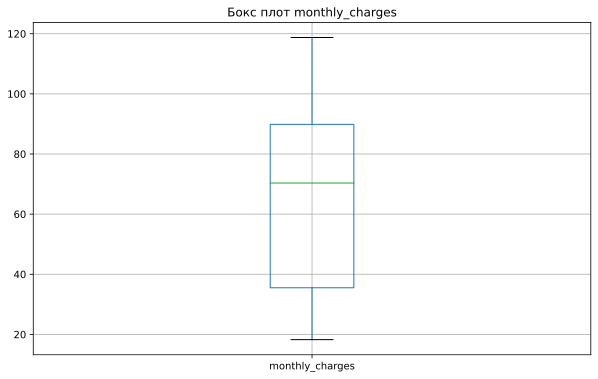

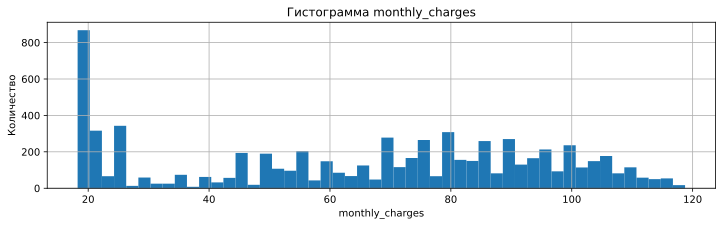

In [81]:
describe_numeric_column('monthly_charges')

- Признак `monthly_charges` - выбросов и аномальных значений не наблюдается. Распределение данных не нормально – с пиком около 20.

count    7043.000000
mean     2115.377573
std      2112.678861
min        19.050000
25%       436.750000
50%      1343.350000
75%      3236.690000
max      9221.380000
Name: total_charges, dtype: float64

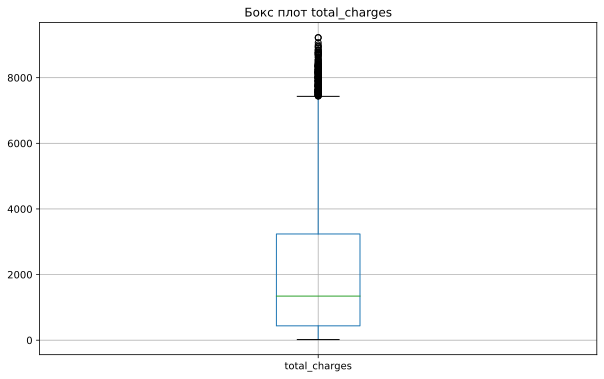

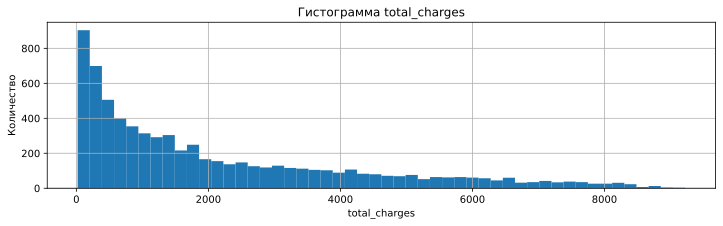

In [83]:
describe_numeric_column('total_charges')

- Признак `total_charges` - выбросов и аномальных значений не наблюдается. Есть значения за пределами "усов" боксплота, однако аномалиями или выбросами это назвать нельзя. Оставляем. Распределение данных напоминает распределение Пуассона.

count    7043.000000
mean      898.555729
std       683.130510
min         0.000000
25%       276.000000
50%       761.000000
75%      1461.000000
max      2314.000000
Name: duration_contract, dtype: float64

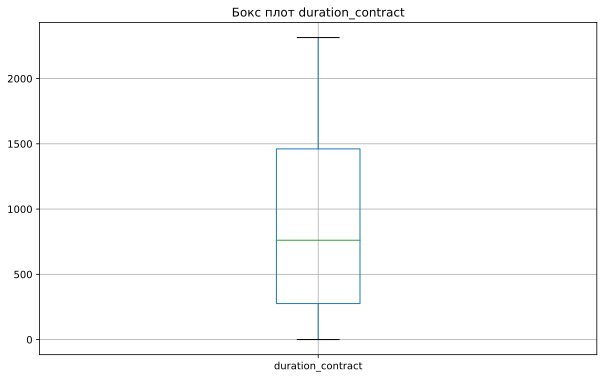

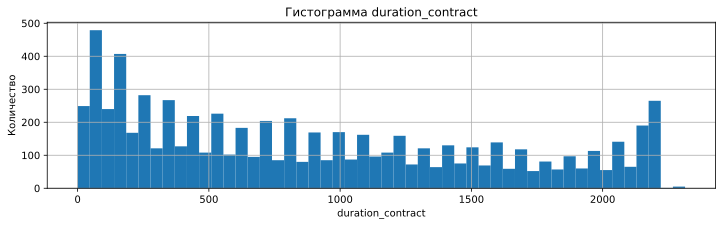

In [85]:
describe_numeric_column('duration_contract')

- Признак `duration_contract` - выбросов и аномальных значений не наблюдается. Распределение данных напоминает распределение Пуассона.

###  Исследовательский анализ категориальных признаков

0    5942
1    1101
Name: deactive_contract, dtype: int64


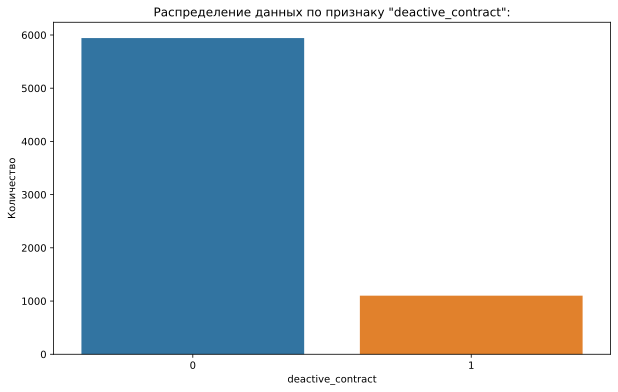

************************************************************************************************************************


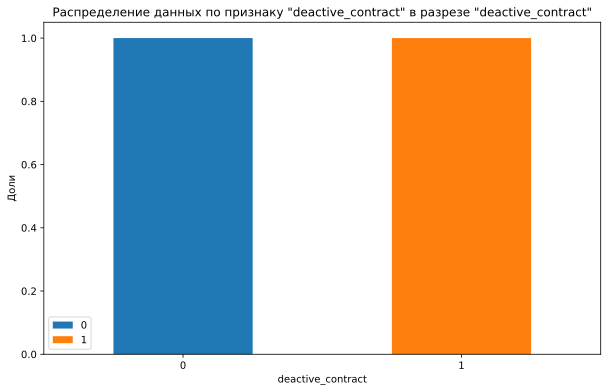

In [88]:
describe_category_column('deactive_contract')

- Признак `deactive_contract` является целевым. Наблюдается дисбаланс – значение «0» перевешивает значение «1» практически в 6 раз. Но это и логично, иначе бизнес телекоммуникационной компании разорился.

Month-to-month    3875
One year          1473
Two year          1695
Name: type, dtype: int64


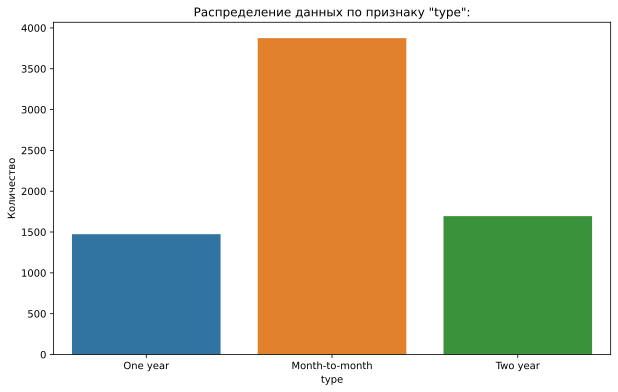

************************************************************************************************************************


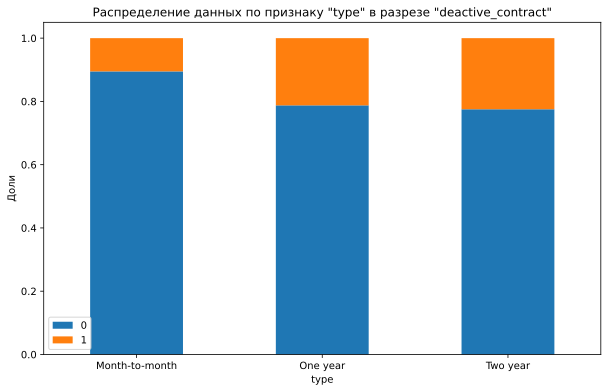

In [90]:
describe_category_column('type')

- Признак `type` - тип оплаты – преобладает ежемесячная оплата услуг, раз в год или два раза в год – примерно на одном уровне. Доля закрытых контрактов при ежемесячной оплате заметно меньше, чем при оплате раз или два в год.

No     2872
Yes    4171
Name: paperless_billing, dtype: int64


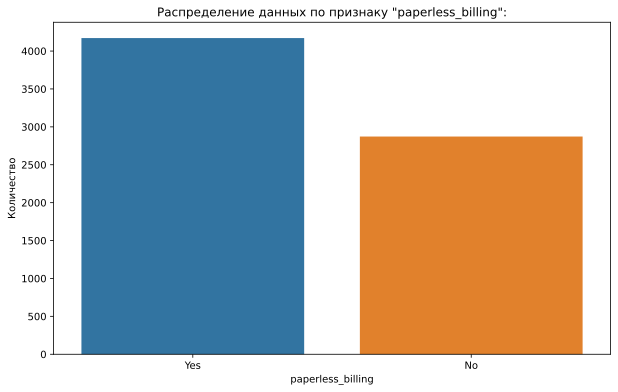

************************************************************************************************************************


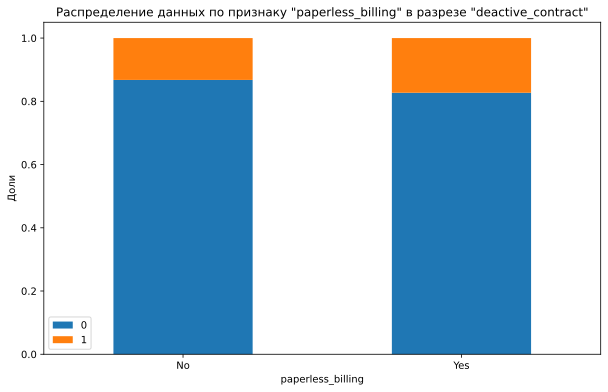

In [92]:
describe_category_column('paperless_billing')

- Признак `paperless_billing` - заметно преобладает электронное предоставление счета. Доля закрытых контрактов не сильно отличается между клиентами, предпочитающими бумажный счет и клиентами, получающими счет электронно.

Bank transfer (automatic)    1544
Credit card (automatic)      1522
Electronic check             2365
Mailed check                 1612
Name: payment_method, dtype: int64


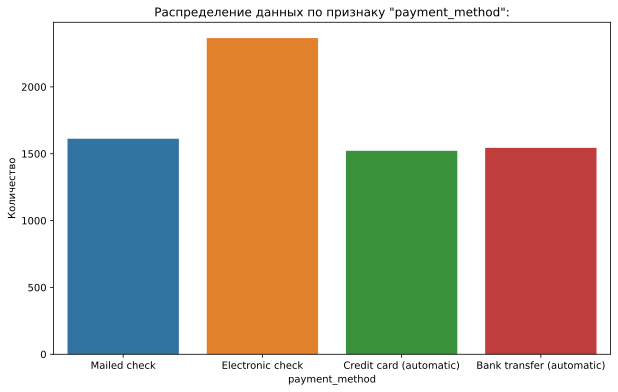

************************************************************************************************************************


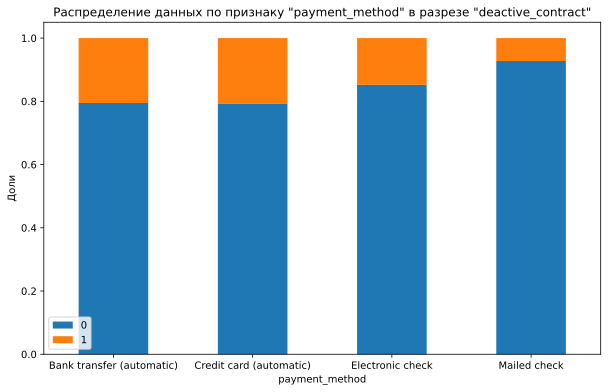

In [94]:
describe_category_column('payment_method')

- Признак `payment_method` - заметно превалирует метод электронной оплаты (Electronic check), хотя доля закрытых контрактов меньше всего при методе оплаты `Mailed check`.

Female    3488
Male      3555
Name: gender, dtype: int64


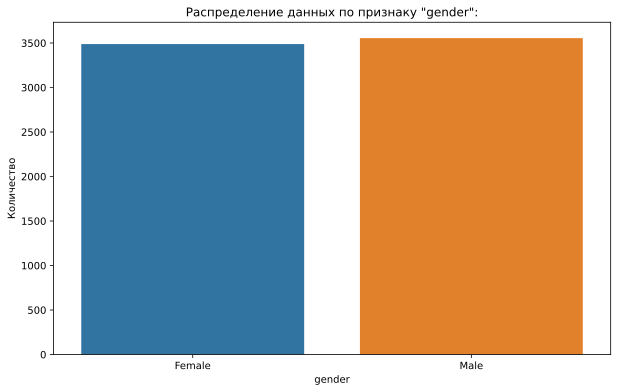

************************************************************************************************************************


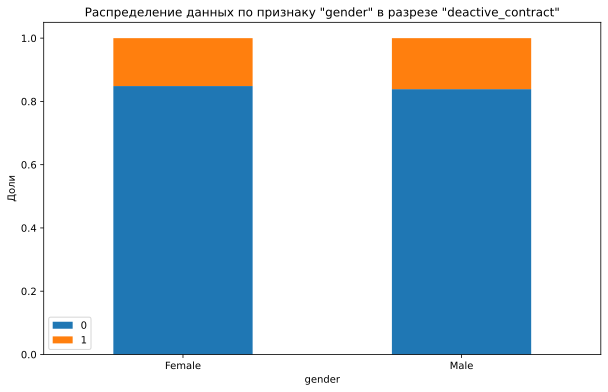

In [96]:
describe_category_column('gender')

- Признак `gender` - наблюдается баланс, данные примерно равны между мужчинами и женщинами. Доля закрытых контрактов также не особо зависит от пола.

No     5901
Yes    1142
Name: senior_citizen, dtype: int64


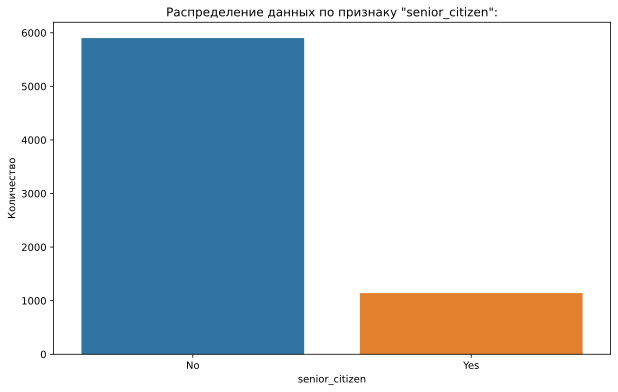

************************************************************************************************************************


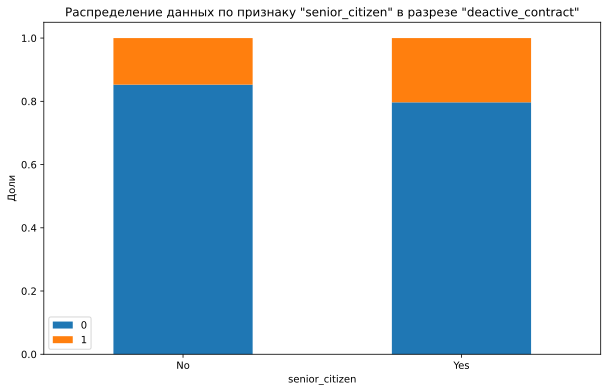

In [98]:
describe_category_column('senior_citizen')

- Признак `senior_citizen` - большинство клиентов не является пенсионерами, но доля закрывших контракт пенсионеров не на много больше доли закрывших контракт работающих клиентов.

No     3641
Yes    3402
Name: partner, dtype: int64


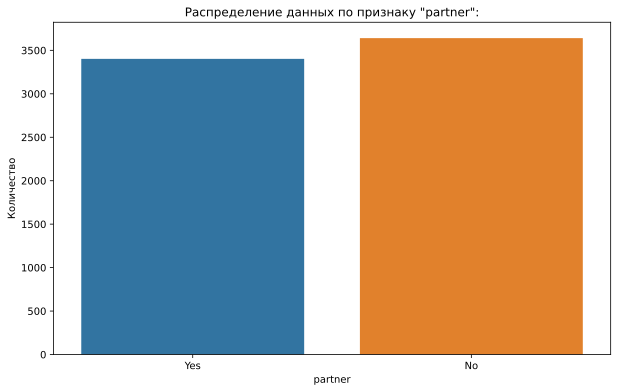

************************************************************************************************************************


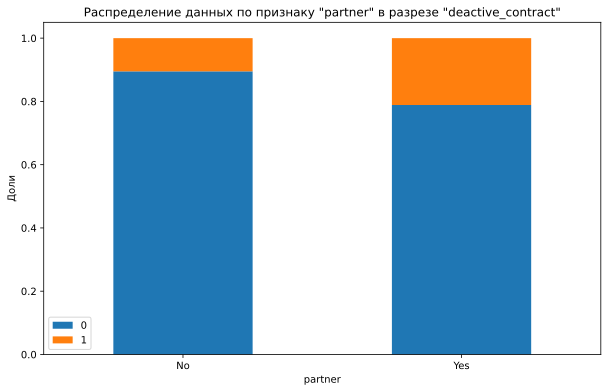

In [100]:
describe_category_column('partner')

- Признак `partner` - наблюдается практически баланс между клиентами, имеющими супруга/у и клиентами без. Доля закрытых контрактов меньше у клиентов, не имеющих супруга/у.

No     4933
Yes    2110
Name: dependents, dtype: int64


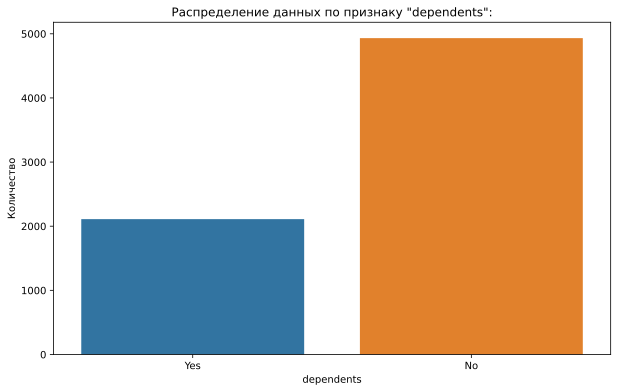

************************************************************************************************************************


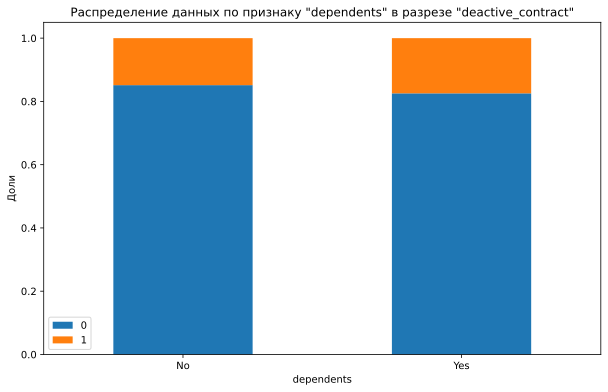

In [102]:
describe_category_column('dependents')

- Признак `dependents` - клиентов, у которых есть дети более чем в два раза меньше клиентов без детей, доли закрытых контрактов практически равны у обоих категорий.

DSL            2421
Fiber optic    3096
not_use        1526
Name: internet_service, dtype: int64


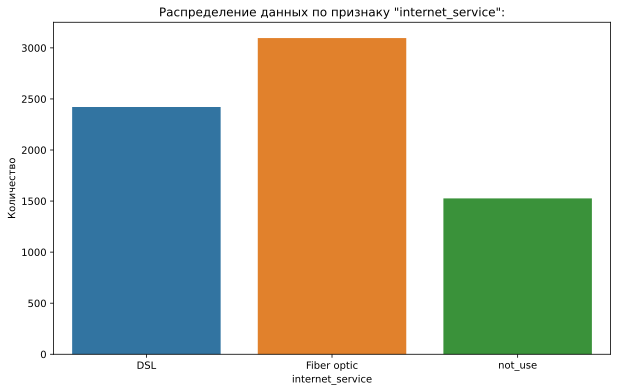

************************************************************************************************************************


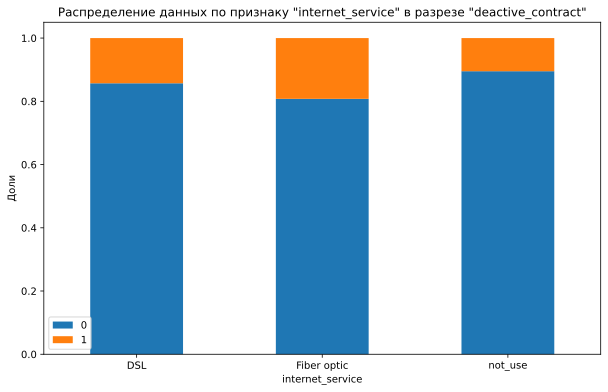

In [104]:
describe_category_column('internet_service')

- Признак `internet_service` - преобладают пользователи, которые пользуются подключением по оптоволокну. Однако есть большая доля не пользующихся интернетом. Доля закрывших договор также больше среди тех, кто пользуется оптоволоконным подключением.

No         3498
Yes        2019
not_use    1526
Name: online_security, dtype: int64


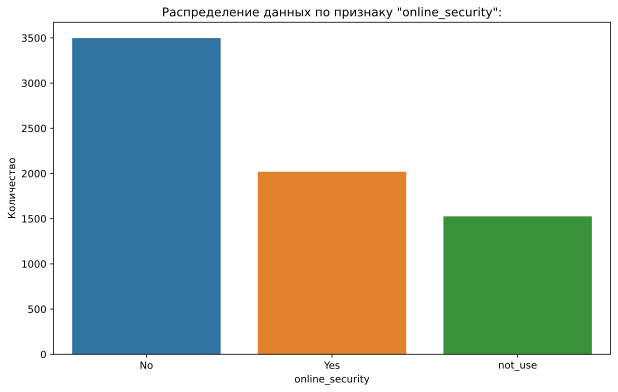

************************************************************************************************************************


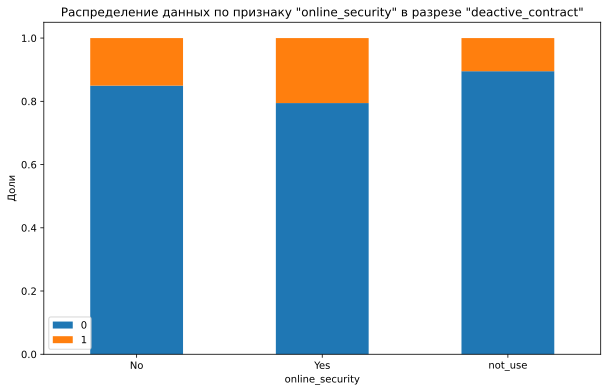

In [106]:
describe_category_column('online_security')

- Признак `online_security` - по большей части клиенты не пользуются блокировкой опасных сайтов, причем доля ушедших клиентов больше как раз с использованием сервиса.

No         3088
Yes        2429
not_use    1526
Name: online_backup, dtype: int64


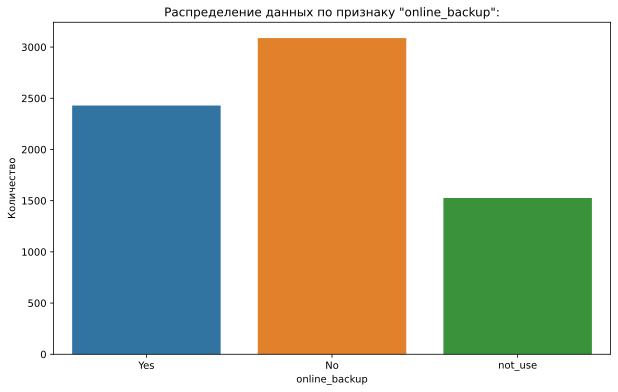

************************************************************************************************************************


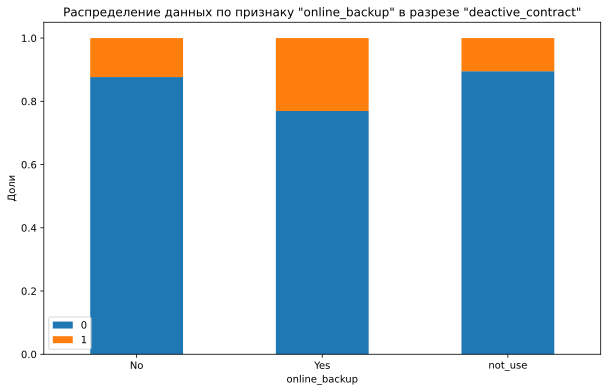

In [108]:
describe_category_column('online_backup')

- Признак `online_backup` - большая часть клиентов не пользуется облачными сервисами, а отток клиентов больше именно с использованием облака.

No         3095
Yes        2422
not_use    1526
Name: device_protection, dtype: int64


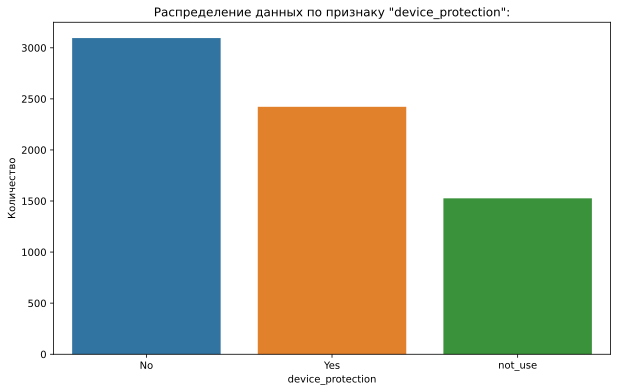

************************************************************************************************************************


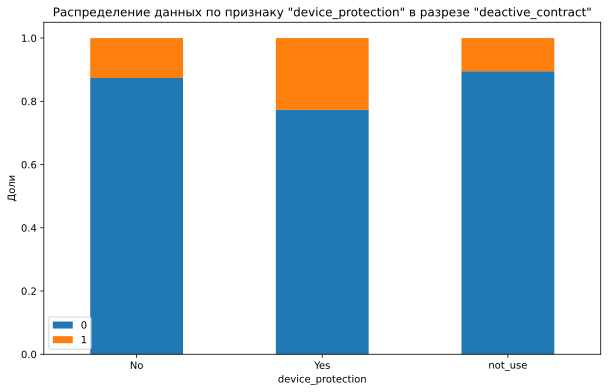

In [110]:
describe_category_column('device_protection')

- Признак `device_protection` - большая часть клиентов не пользуется антивирусом, а те - кто пользуются – большая часть уходит.

No         3473
Yes        2044
not_use    1526
Name: tech_support, dtype: int64


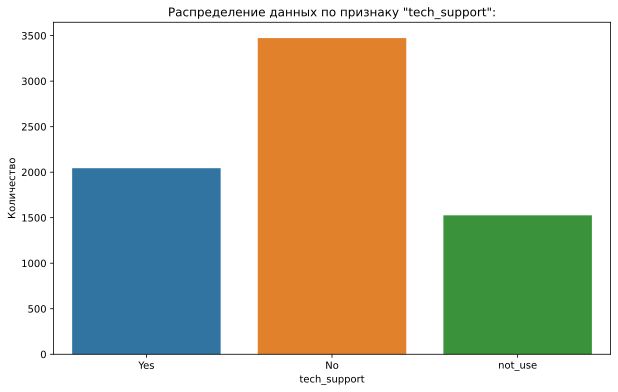

************************************************************************************************************************


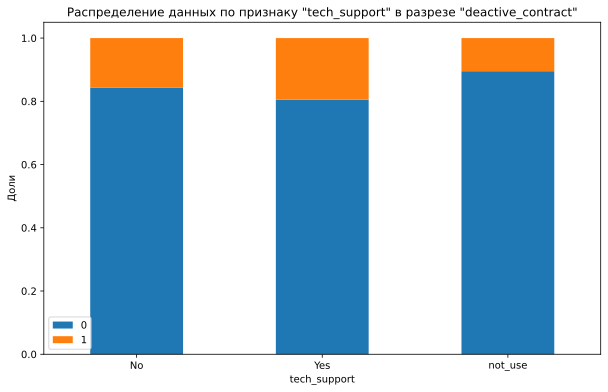

In [112]:
describe_category_column('tech_support')

- Признак `tech_support` - большая часть клиентов не пользуется услугами выделенной линией техподдержки, а те - кто пользуются – большая часть уходит.

No         2810
Yes        2707
not_use    1526
Name: streaming_tv, dtype: int64


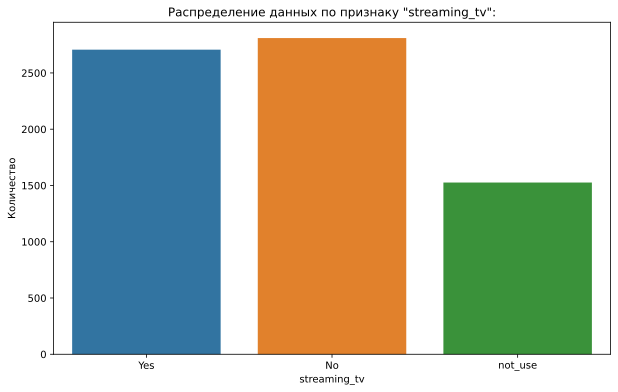

************************************************************************************************************************


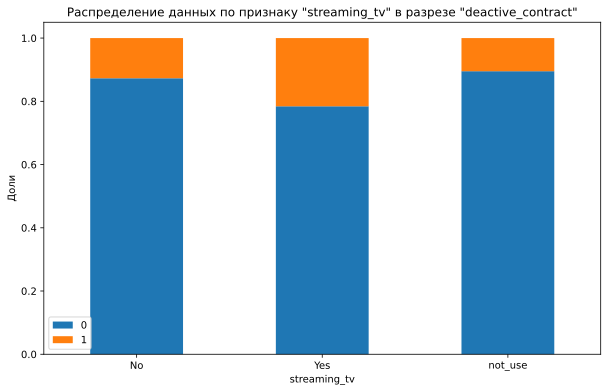

In [114]:
describe_category_column('streaming_tv')

- Признак `streaming_tv` - наблюдается баланс между теми, кто пользуется услугой стримингого ТВ и теми, кто нет, но среди тех, кто пользуется – больше доля закрывающих контракт.

No         2785
Yes        2732
not_use    1526
Name: streaming_movies, dtype: int64


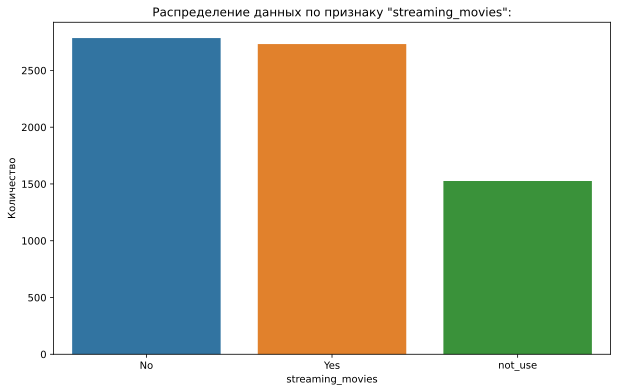

************************************************************************************************************************


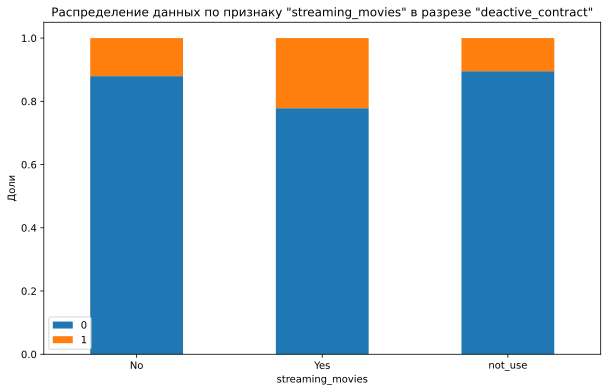

In [116]:
describe_category_column('streaming_movies')

- Признак `streaming_movies` - наблюдается баланс между теми, кто пользуется просмотровм фильмов из каталога и теми, кто нет, но среди тех, кто пользуется – больше доля закрывающих контракт.

No         3390
Yes        2971
not_use     682
Name: multiple_lines, dtype: int64


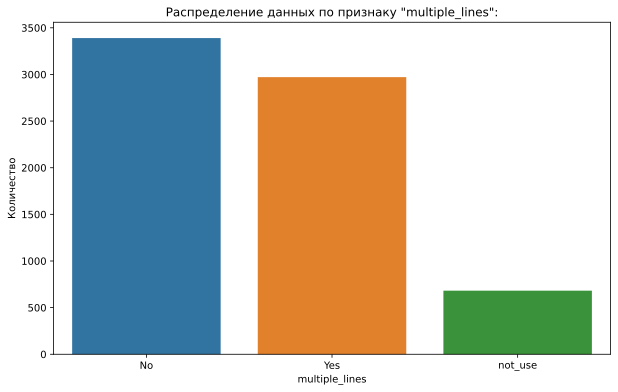

************************************************************************************************************************


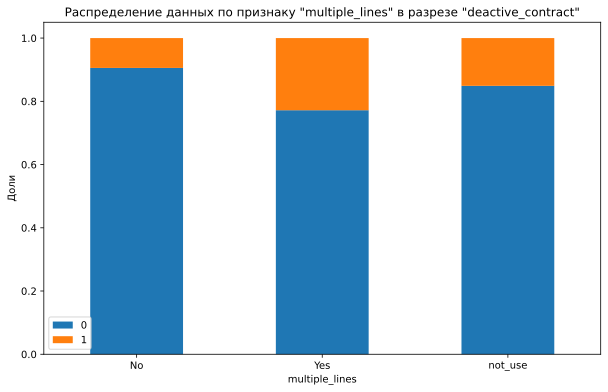

In [118]:
describe_category_column('multiple_lines')

- Признак `multiple_lines` - в целом, услуга телефонной (удивительно!) связи популярнее, чем услуга доступа в интернет, однако доля клиентов, не использующих услугу многоканальной связи среди тех, кто пользуется вообще телефонной связью, немного больше, кто использует подключение телефона к нескольким линиям одновременно. Доля же использующих данную услугу среди ушедших с обслуживания – больше оставшихся.

### Корреляционный анализ

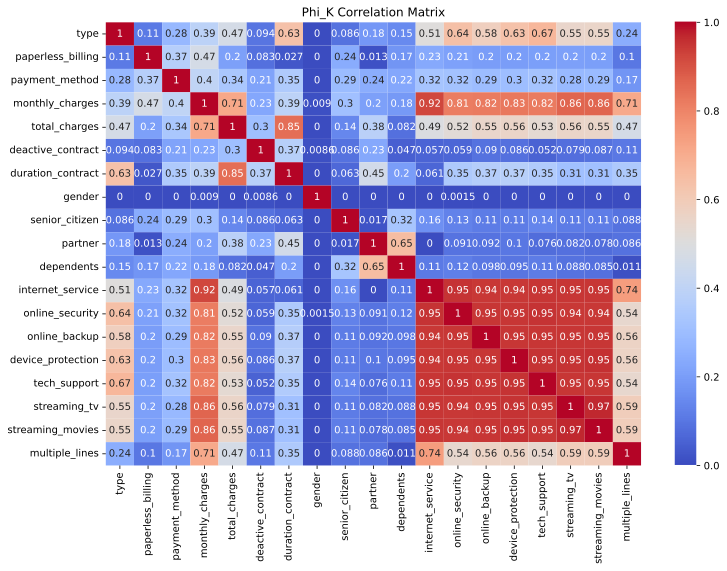

In [121]:
plt.figure(figsize=(12, 8))
sns.heatmap(merger_df.phik_matrix(interval_cols = ['monthly_charges', 
                                                   'total_charges', 
                                                   'duration_contract']), annot=True, cmap='coolwarm');
plt.title('Phi_K Correlation Matrix')
plt.show()

**Корреляционный анализ**
- В целом, наблюдается довольно низкая взаимосвязь признаков с нашим целевым признаком `deactive_contract`. Наиболее сильно связаны с целевым признаком длительность контракта, общая сумма затрат, наличие супруга/и у клиента, сумма месячных затрат и метод оплаты.
- Признак пола вообще не коррелирует ни с одним из признаков, можно смело его не использовать.
- Признаки, связанные с интернет подключением сильно коррелирует между собой, но скорее всего это не мультиколлинеарность, но даже если и так - то это небольшая проблема, так как влияет прежде всего на линейные модели, да и то не всегда. Однако, следует удалить в следующем шаге ненужный признак `gender`, а также признак `streaming_tv`, имеющий большую корреляцию с признаком `streaming_movies`. Последний же оставим, как имеющий бОльшую корреляцию с целевым признаком, чем `streaming_tv`.

### Вывод по итогам исследовательского анализа объединенного датафрейма

**Количественные признаки**

- Признак `monthly_charges` - выбросов и аномальных значений не наблюдается. Распределение данных не нормально – с пиком около 20.
- Признак `total_charges` - выбросов и аномальных значений не наблюдается. Есть значения за пределами "усов" боксплота, однако аномалиями или выбросами это назвать нельзя. Оставляем. Распределение данных напоминает распределение Пуассона.
- Признак `duration_contract` - выбросов и аномальных значений не наблюдается. Распределение данных напоминает распределение Пуассона.

**Категориальные признаки**

- Признак `deactive_contract` является целевым. Наблюдается дисбаланс – значение «0» перевешивает значение «1» практически в 6 раз. Но это и логично, иначе бизнес телекоммуникационной компании разорился.
- Признак `type` - тип оплаты – преобладает ежемесячная оплата услуг, раз в год или два раза в год – примерно на одном уровне. Доля закрытых контрактов при ежемесячной оплате заметно меньше, чем при оплате раз или два в год.
- Признак `paperless_billing` - заметно преобладает электронное предоставление счета. Доля закрытых контрактов не сильно отличается между клиентами, предпочитающими бумажный счет и клиентами, получающими счет электронно.
- Признак `payment_method` - заметно превалирует метод электронной оплаты (Electronic check), хотя доля закрытых контрактов меньше всего при методе оплаты `Mailed check`.
- Признак `gender` - наблюдается баланс, данные примерно равны между мужчинами и женщинами. Доля закрытых контрактов также не особо зависит от пола.
- Признак `senior_citizen` - большинство клиентов не является пенсионерами, но доля закрывших контракт пенсионеров не на много больше доли закрывших контракт работающих клиентов.
- Признак `partner` - наблюдается практически баланс между клиентами, имеющими супруга/у и клиентами без. Доля закрытых контрактов меньше у клиентов, не имеющих супруга/у.
- Признак `dependents` - клиентов, у которых есть дети более чем в два раза меньше клиентов без детей, доли закрытых контрактов практически равны у обоих категорий.
- Признак `internet_service` - преобладают пользователи, которые пользуются подключением по оптоволокну. Однако есть большая доля не пользующихся интернетом. Доля закрывших договор также больше среди тех, кто пользуется оптоволоконным подключением.
- Признак `online_security` - по большей части клиенты не пользуются блокировкой опасных сайтов, причем доля ушедших клиентов больше как раз с использованием сервиса.
- Признак `online_backup` - большая часть клиентов не пользуется облачными сервисами, а отток клиентов больше именно с использованием облака.
- Признак `device_protection` - большая часть клиентов не пользуется антивирусом, а те - кто пользуются – большая часть уходит.
- Признак `tech_support` - большая часть клиентов не пользуется услугами выделенной линией техподдержки, а те - кто пользуются – большая часть уходит.
- Признак `streaming_tv` - наблюдается баланс между теми, кто пользуется услугой стримингого ТВ и теми, кто нет, но среди тех, кто пользуется – больше доля закрывающих контракт.
- Признак `streaming_movies` - наблюдается баланс между теми, кто пользуется просмотровм фильмов из каталога и теми, кто нет, но среди тех, кто пользуется – больше доля закрывающих контракт.
- Признак `multiple_lines` - в целом, услуга телефонной (удивительно!) связи популярнее, чем услуга доступа в интернет, однако доля клиентов, не использующих услугу многоканальной связи среди тех, кто пользуется вообще телефонной связью, немного больше, кто использует подключение телефона к нескольким линиям одновременно. Доля же использующих данную услугу среди ушедших с обслуживания – больше оставшихся.

**Корреляционный анализ**
- В целом, наблюдается довольно низкая взаимосвязь признаков с нашим целевым признаком `deactive_contract`. Наиболее сильно связаны с целевым признаком длительность контракта, общая сумма затрат, наличие супруга/и у клиента, сумма месячных затрат и метод оплаты.
- Признак пола вообще не коррелирует ни с одним из признаков, можно смело его не использовать.
- Признаки, связанные с интернет подключением сильно коррелирует между собой, но скорее всего это не мультиколлинеарность, но даже если и так - то это небольшая проблема, так как влияет прежде всего на линейные модели, да и то не всегда. Однако, следует удалить в следующем шаге ненужный признак `gender`, а также признак `streaming_tv`, имеющий большую корреляцию с признаком `streaming_movies`. Последний же оставим, как имеющий бОльшую корреляцию с целевым признаком, чем `streaming_tv`.

## Подготовка данных

В целях подготовки данных, разделим датафрейм на входные и целевой признаки:

In [126]:
X = merger_df.drop(['deactive_contract', 'gender', 'streaming_tv'], axis=1)
y = merger_df['deactive_contract']

Полученные данные разбиваем на обучающую и тестовую выборки в соотношении 3:1, учитывая заданный параметр random_state с перемешиванием и со стратификацией по целевой переменной (параметр stratify) для сохранения одинакового баланса классов:

In [128]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = TEST_SIZE, 
                                                    random_state = RANDOM_STATE, stratify = y)

Проверим размерности получившихся выборок:

In [130]:
print('Тренировочная выборка. target: ', y_train.shape)
print('Тренировочная выборка. features: ', X_train.shape)
print('Тестовая выборка. target: ', y_test.shape )
print('Тестовая выборка. features = ', X_test.shape)

Тренировочная выборка. target:  (5282,)
Тренировочная выборка. features:  (5282, 16)
Тестовая выборка. target:  (1761,)
Тестовая выборка. features =  (1761, 16)


In [131]:
# Определим категориальные признаки в отдельную переменную:
cat_cols = X.select_dtypes(include=['object']).columns.tolist()
cat_cols

['type',
 'paperless_billing',
 'payment_method',
 'senior_citizen',
 'partner',
 'dependents',
 'internet_service',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_movies',
 'multiple_lines']

In [132]:
# Определим числовые признаки в отдельную переменную:
num_cols = X.select_dtypes(exclude=['object']).columns.tolist()
num_cols

['monthly_charges', 'total_charges', 'duration_contract']

### Вывод по итогам подготовки данных

- Данные разбиты на две выборки: обучающую и тестовую выборки в соотношении 3:1, учитывая заданный параметр random_state с перемешиванием и со стратификацией по целевой переменной (параметр stratify) для сохранения одинакового баланса классов.
- Определены переменные - списки с числовыми и категориальными признаками

## Обучение моделей машинного обучения

1. Подготовим признаки - закодируем категориальные и отмасштабируем числовые. OneHotEncoder() используем только для логистической регрессии, OrdinalEncoder() - только для случайного леса. Для CatBoost кодирование не требуется.
2. Обучим три модели: LogisticRegression, RandomForestClassifier и CatBoostClassifier.
3. Подбор гиперпараметров на кроссвалидации по обучающей выборке осуществим с помощью GridSearchCV.

In [136]:
# Pipeline и GridSearch для логистической регрессии
logreg_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OneHotEncoder(), cat_cols)
    ])),
    ('classifier', LogisticRegression(class_weight='balanced', solver='liblinear', random_state = RANDOM_STATE))
])

logreg_param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}

logreg_grid_search = GridSearchCV(logreg_pipeline, logreg_param_grid, scoring='roc_auc', cv=5)
start_logreg = time.time()
logreg_grid_search.fit(X_train, y_train)
end_logreg = time.time()

# Результаты логистической регрессии
# Результаты логистической регрессии
print('Лучшие параметры для логистической регрессии:', logreg_grid_search.best_params_)
print('Лучший ROC AUC для логистической регрессии: {:.4f}'.format(logreg_grid_search.best_score_))
print('Время обучения логистической регрессии: {:.2f} секунд'.format(end_logreg - start_logreg))

Лучшие параметры для логистической регрессии: {'classifier__C': 1, 'classifier__penalty': 'l2'}
Лучший ROC AUC для логистической регрессии: 0.7676
Время обучения логистической регрессии: 5.43 секунд


In [137]:
# Pipeline и GridSearch для случайного леса
rf_pipeline = Pipeline([
    ('preprocessor', ColumnTransformer(transformers=[
        ('num', StandardScaler(), num_cols),
        ('cat', OrdinalEncoder(), cat_cols)
    ])),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state = RANDOM_STATE))
])

rf_param_grid = {
    'classifier__n_estimators': [50, 100, 200, 400],
    'classifier__max_depth': [None, 10, 20]
}

rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, scoring='roc_auc', cv=5)
start_rf = time.time()
rf_grid_search.fit(X_train, y_train)
end_rf = time.time()

# Результаты случайного леса
print('Лучшие параметры для случайного леса:', rf_grid_search.best_params_)
print('Лучший ROC AUC для случайного леса: {:.4f}'.format(rf_grid_search.best_score_))
print('Время обучения случайного леса: {:.2f} секунд'.format(end_rf - start_rf))

Лучшие параметры для случайного леса: {'classifier__max_depth': 10, 'classifier__n_estimators': 400}
Лучший ROC AUC для случайного леса: 0.8237
Время обучения случайного леса: 72.95 секунд


In [138]:
# Подготовка данных для CatBoost

X_train_catboost = X_train.copy()
X_test_catboost = X_test.copy()

# Pipeline и GridSearch для CatBoost
catboost_pipeline = Pipeline([
    ('classifier', CatBoostClassifier(cat_features=cat_cols, eval_metric='AUC', verbose=0, random_state = RANDOM_STATE))
])

catboost_param_grid = {
    'classifier__iterations': [100, 200, 400, 600],
    'classifier__learning_rate': [0.01, 0.1, 0.2, 0.3, 0.5],
    'classifier__depth': [4, 6, 8]
}

catboost_grid_search = GridSearchCV(catboost_pipeline, catboost_param_grid, scoring='roc_auc', cv=5)
start_catboost = time.time()
catboost_grid_search.fit(X_train_catboost, y_train)
end_catboost = time.time()

# Результаты CatBoost
print('Лучшие параметры для CatBoost:', catboost_grid_search.best_params_)
print('Лучший ROC AUC для CatBoost: {:.4f}'.format(catboost_grid_search.best_score_))
print('Время обучения CatBoost: {:.2f} секунд'.format(end_catboost - start_catboost))

Лучшие параметры для CatBoost: {'classifier__depth': 4, 'classifier__iterations': 600, 'classifier__learning_rate': 0.2}
Лучший ROC AUC для CatBoost: 0.9169
Время обучения CatBoost: 3035.84 секунд


### Вывод по итогам обучения моделей машинного обучения

- Подготовили признаки - закодировали категориальные и отмасштабируем числовые. OneHotEncoder() использовали только для логистической регрессии, OrdinalEncoder() - только для случайного леса. Для CatBoost кодирование не требуется.
- Обучили три модели: LogisticRegression, RandomForestClassifier и CatBoostClassifier.
- Подбор гиперпараметров на кроссвалидации по обучающей выборке осуществили с помощью GridSearchCV.

## Выбор лучшей модели

Сведем все полученные данные моделей в таблицу:

In [142]:
results = pd.DataFrame({'ROC-AUC':[round(logreg_grid_search.best_score_, 4), 
                                   round(rf_grid_search.best_score_, 4), 
                                   round(catboost_grid_search.best_score_, 4)],
                        'Learning time':[round((end_logreg - start_logreg), 0), 
                                         round((end_rf - start_rf), 0), 
                                         round((end_catboost - start_catboost), 0)]
                       }, 
                       index=['LogisticRegression', 
                              'RandomForestClassifier', 
                              'CatBoostClassifier'])
results.sort_values(by=['ROC-AUC'], ascending=False)

,ROC-AUC,Learning time
CatBoostClassifier,0.9169,3036.0
RandomForestClassifier,0.8237,73.0
LogisticRegression,0.7676,5.0


По итогам сравнения по метрике ROC-AUС в вышеуказанной таблице видим, что лучше всех справилась с поставленной задачей модель CatBoostClassifier, несмотря на довольно длительное время обучения.

Протестируем выбранную модель на тестовых данных:

In [144]:
start_predict = time.time()
predict_proba = catboost_grid_search.predict_proba(X_test_catboost)
end_predict = time.time()

# Результаты предсказания
print('Показатель ROC AUC на тестовой выборке: {:.4f}'.format(roc_auc_score(y_test, predict_proba[:, 1])))
print('Время предсказания: {:.2f} секунд'.format(end_predict - start_predict))

Показатель ROC AUC на тестовой выборке: 0.9275
Время предсказания: 0.02 секунд


Получили значение ROC-AUC на тетовой выборке больше 0.85, что сооответствует условию проекта.

Рассмотрим как выглядит ROC кривая и постараемся интерпретировать результаты:

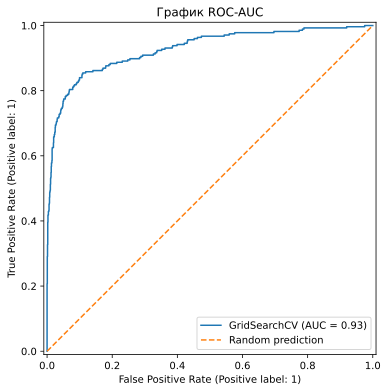

In [146]:
# выведим на экран ROC-кривую методом from_estimator()
RocCurveDisplay.from_estimator(catboost_grid_search, X_test_catboost, y_test)
plt.plot([0,1], [0,1], linestyle='dashed', label='Random prediction')
plt.title("График ROC-AUC")
plt.legend()
plt.show()

**Вывод на основе кривой ROC**

Чем больше кривая ROC охватывает верхний левый угол графика, тем лучше модель классифицирует данные по категориям. Наша кривая ROC довольно не плохо охватывает верхний левый угол.

Модель имеет довольно высокую AUC (площадь под кривой), что указывает на то, что она в большинстве случаев правильно предсказывает целевой признак.

Посмотрим на метрику Accuracy:

In [148]:
predict = catboost_grid_search.predict(X_test_catboost)
print('Показатель Accuracy на тестовой выборке: {:.4f}'.format(accuracy_score(y_test, predict)))

Показатель Accuracy на тестовой выборке: 0.9273


**Вывод на основе показателя Accuracy**

Показатель Accuracy на тестовой выборке составил 0.9324. Это означает, что чуть больше, чем в 93% случаев, модель предсказывает верно класс объекта. Не плохой показатель, хоть и существует почти 7% случаев, в которых модель делает ошибку.

Посмотрим расклад по количеству предсказанных объектов разного класса на матрице ошибок:

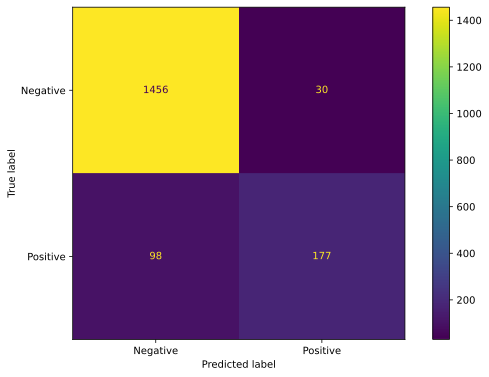

In [150]:
cm = confusion_matrix(y_test, predict)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Negative", "Positive"])
disp.plot()
plt.show()

**Вывод на основе матрицы ошибок**

- протестированная модель более чем в 98,5% правильно предсказывает активность контракта (в нашем случае это класс "0" - договор не расторгнут - значения в горизонтали "Negative");
- предсказания расторжения договора (класс "1" - договор расторгнут - значения в горизонтали "Positive") - выглядят несколько хуже - только в 70% модель предскажет расторжение контракта.

Так как алгоритм CatBoost основан на градиентных деревьях решений, и при обучении этой модели последовательно строится набор деревьев решений, используем feature_importances_ для анализа важности признаков:

In [153]:
pd.DataFrame(catboost_grid_search.best_estimator_[-1].feature_importances_, 
             index = X_train_catboost.columns.values.tolist(),
             columns = ['Важность признака']).sort_values(by = 'Важность признака', ascending = False)

,Важность признака
duration_contract,52.679299
total_charges,9.935893
monthly_charges,9.783729
type,7.825202
multiple_lines,3.410548
payment_method,3.401122
partner,2.906484
online_backup,1.951910
tech_support,1.943444
device_protection,1.699716


**Вывод на основе анализа признаков**

- самым влиятельным признаком является продолжительность котракта в днях. Также, не смотря на большой отрыв, выжными признаками являются суммы общих и ежемесячных затрат и тип оплаты. Изменение этих признаков больше всего повлияет на результат предсказания;
- следующие на ступеньки иерархии важности - это наличие подключение телефона к нескольким линиям одновременно, метод оплаты и наличие супруга/и;
- сымыми "невлиятельными" признаками являются признаки связанные с интернетом, факт наличия детей, является ли пенсионером клиент и метод доставки счета.

## Общий вывод и рекомендации заказчику

**Целью данного проекта было обучение на полученных данных модели для прогноза оттока клиентов. Для подбора гиперпараметров модели и её тестирования необходимо было использовать метрику ROC-AUC. Минимальный порог ROC-AUC >= 0.85**

**Описание данных**
- Данные состоят из нескольких файлов, полученных из разных источников:
    - contract_new.csv — информация о договоре;
    - personal_new.csv — персональные данные клиента;
    - internet_new.csv — информация об интернет-услугах;
    - phone_new.csv — информация об услугах телефонии.

- Файл contract_new.csv
    - customerID — идентификатор абонента;
    - BeginDate — дата начала действия договора;
    - EndDate — дата окончания действия договора;
    - Type — тип оплаты: раз в год-два или ежемесячно;
    - PaperlessBilling — электронный расчётный лист;
    - PaymentMethod — тип платежа;
    - MonthlyCharges — расходы за месяц;
    - TotalCharges — общие расходы абонента.

- Файл personal_new.csv
    - customerID — идентификатор пользователя;
    - gender — пол;
    - SeniorCitizen — является ли абонент пенсионером;
    - Partner — есть ли у абонента супруг или супруга;
    - Dependents — есть ли у абонента дети.

- Файл internet_new.csv
    - customerID — идентификатор пользователя;
    - InternetService — тип подключения;
    - OnlineSecurity — блокировка опасных сайтов;
    - OnlineBackup — облачное хранилище файлов для резервного копирования данных;
    - DeviceProtection — антивирус;
    - TechSupport — выделенная линия технической поддержки;
    - StreamingTV — стриминговое телевидение;
    - StreamingMovies — каталог фильмов.

- Файл phone_new.csv
    - customerID — идентификатор пользователя;
    - MultipleLines — подключение телефона к нескольким линиям одновременно.

Во всех файлах столбец customerID содержит код клиента. Информация о договорах актуальна на 1 февраля 2020 года.

**Выводы по итогам загрузки данных:**
- Датафрейм `df_contract`:
    - датафрейм содержит 8 столбцов и 7043 строки;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных дубликатов нет, могут присутствовать неявные дубликаты - проверим их в шаге 2;
    - на первый взгляд, нарушен тип данных в столбцах `BeginDate` и `TotalCharges`, возможно и в `EndDate`. Скорее всего связано с наполнением - рассмотрим в шаге 2, изменим при необходимости;
    - признак `EndDate` подходит под определение целевого в нашей задаче, однако в таком виде он не подойдет, скорее всего необходимо будет создать новый признак - рассмотрим во 2 шаге;
- Датафрейм `df_personal`:
    - датафрейм содержит 5 столбцов и 7043 строки;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных дубликатов нет, могут присутствовать неявные дубликаты - проверим их в шаге 2;
    - тип данных, на первый взгляд, соответствует наполнению, изменение не требуется, за исключением столбца SeniorCitizen - он имеет числовой тип, хотя фактически является категориальным. На этапе анализа для удобства построения диаграмм его лучше преобразовать по аналогии с другими столбцами в строки 'Yes'/'No';
- Датафрейм `df_internet`:
    - датафрейм содержит 8 столбцов и 5517 строк - видимо, не все клиенты используют интернет;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных и неявных дубликатов нет;
    - тип данных, на первый взгляд, соответствует наполнению, изменение не требуется;
- Датафрейм `df_phone`:
    - датафрейм содержит 2 столбца и 6361 строку - видимо, не все клиенты используют телефонную связь;
    - наблюдается нарушение "змеиного" стиля в названии столбцов;
    - пропусков не наблюдается;
    - явных и неявных дубликатов нет;
    - тип данных, на первый взгляд, соответствует наполнению, изменение не требуется.

**Выводы по итогам исследовательского анализа и предобработки данных:**
- Датафрейм `df_contract`
    - Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
    - Столбец `begin_date` содержит дату начала контракта, однако формат данных не верный - перевели в формат data - потребуется для формирования нового признака - длительность контракта. Возможно признак `begin_date` не понадобится для обучения модели - вывод сделаем в 4 шаге;
    - Столбец `end_date` содержит дату окончания контракта и значение "No", означающее, что на дату выгрузки (01 февраля 2020) контракт действует. На основе этого столбца сформировали наш целевой признак `deactive_contract`- признак завершения действия контракта, где "0" означает, что контракт действует (значение "No" в признаке `end_date`), а "1" - контракт закрыт (значение даты в признаке `end_date`). Перевели в фармат data. Возможно признак `begin_date` не понадобится для обучения модели - вывод сделаем в 4 шаге;
    - Сформировали дополнительный признак `duration_contract` - длительность контракта на основе признаков `end_date` и `begin_date`.
    - Столбец `type` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `paperless_billing` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `payment_method` - категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `monthly_charges` - содержит числовые значения, тип данных верный, явных ошибок в данных не обнаружено. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `total_charges` - обнаружены пробелы вместо числовых данных, соглано выгрузке - это клиенты, у которых только начался контракт (дата начала - 2020-02-01) - у них есть оплата в этом месяце, но общая сумма затрат еще не подсчитана, соответственно, заменили пробелы на уже существующие месячные оплаты и перевели тип данных всего столбца в числовое значение. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбцы `begin_date` и `end_date` после формирования новых признаков `deactive_contract` и `duration_contract` за ненадобностью были удалены.

- Датафрейм `df_personal`
    - Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
    - Столбец `gender` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `senior_citizen` - бинарный категориальный признак, дубликатов, описок не выявлено. Отличается от других признаков числовыми значениями, с целью приведения данных к унифицированной форме, перевели значения 0 и 1 к "No" и "Yes" соответственно. Перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `partner` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели;
    - Столбец `dependents` - бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.

- Датафрейм `df_internet`
    - Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
    - Столбцы `internet_service`, `online_security`, `online_backup`, `device_protection`, `tech_support`, `streaming_tv`, `streaming_movies` бинарные категориальные признаки, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.

- Датафрейм `df_phone`
    - Идентификаторы клиентов являются уникальными, дубликатов не обнаружено - имеет смысл в дальнейшем, перевести этот признак в индекс, для модели этот столбец не информативен. Рассмотрим на шаге объединения данных;
    - Столбец `multiple_lines`- бинарный категориальный признак, дубликатов, описок не выявлено, перед обучением модели трансформируем методом OHE для линейных моделей и OE - для моделей деревьев. Признак, с большой вероятностью, необходим в обучении модели.
    
**Выводы по итогам исследовательского анализа:**
- Перевели признак `customer_id` в индекс во всех датафреймах;
- Объединили все датафреймы в один `merger_df`, возникшие пропуски заполнили значениями `not_use`, так как отсутствие данных, скорее всего говорит о том, что услугами не пользуются.

**Выводы по итогам исследовательского анализа объединенного датафрейма:**
- Количественные признаки
    - Признак `monthly_charges` - выбросов и аномальных значений не наблюдается. Распределение данных не нормально – с пиком около 20.
    - Признак `total_charges` - выбросов и аномальных значений не наблюдается. Есть значения за пределами "усов" боксплота, однако аномалиями или выбросами это назвать нельзя. Оставляем. Распределение данных напоминает распределение Пуассона.
    - Признак `duration_contract` - выбросов и аномальных значений не наблюдается. Распределение данных напоминает распределение Пуассона.

- Категориальные признаки
    - Признак `deactive_contract` является целевым. Наблюдается дисбаланс – значение «0» перевешивает значение «1» практически в 6 раз. Но это и логично, иначе бизнес телекоммуникационной компании разорился.
    - Признак `type` - тип оплаты – преобладает ежемесячная оплата услуг, раз в год или два раза в год – примерно на одном уровне. Доля закрытых контрактов при ежемесячной оплате заметно меньше, чем при оплате раз или два в год.
    - Признак `paperless_billing` - заметно преобладает электронное предоставление счета. Доля закрытых контрактов не сильно отличается между клиентами, предпочитающими бумажный счет и клиентами, получающими счет электронно.
    - Признак `payment_method` - заметно превалирует метод электронной оплаты (Electronic check), хотя доля закрытых контрактов меньше всего при методе оплаты `Mailed check`.
    - Признак `gender` - наблюдается баланс, данные примерно равны между мужчинами и женщинами. Доля закрытых контрактов также не особо зависит от пола.
    - Признак `senior_citizen` - большинство клиентов не является пенсионерами, но доля закрывших контракт пенсионеров не на много больше доли закрывших контракт работающих клиентов.
    - Признак `partner` - наблюдается практически баланс между клиентами, имеющими супруга/у и клиентами без. Доля закрытых контрактов меньше у клиентов, не имеющих супруга/у.
    - Признак `dependents` - клиентов, у которых есть дети более чем в два раза меньше клиентов без детей, доли закрытых контрактов практически равны у обоих категорий.
    - Признак `internet_service` - преобладают пользователи, которые пользуются подключением по оптоволокну. Однако есть большая доля не пользующихся интернетом. Доля закрывших договор также больше среди тех, кто пользуется оптоволоконным подключением.
    - Признак `online_security` - по большей части клиенты не пользуются блокировкой опасных сайтов, причем доля ушедших клиентов больше как раз с использованием сервиса.
    - Признак `online_backup` - большая часть клиентов не пользуется облачными сервисами, а отток клиентов больше именно с использованием облака.
    - Признак `device_protection` - большая часть клиентов не пользуется антивирусом, а те - кто пользуются – большая часть уходит.
    - Признак `tech_support` - большая часть клиентов не пользуется услугами выделенной линией техподдержки, а те - кто пользуются – большая часть уходит.
    - Признак `streaming_tv` - наблюдается баланс между теми, кто пользуется услугой стримингого ТВ и теми, кто нет, но среди тех, кто пользуется – больше доля закрывающих контракт.
    - Признак `streaming_movies` - наблюдается баланс между теми, кто пользуется просмотровм фильмов из каталога и теми, кто нет, но среди тех, кто пользуется – больше доля закрывающих контракт.
    - Признак `multiple_lines` - в целом, услуга телефонной (удивительно!) связи популярнее, чем услуга доступа в интернет, однако доля клиентов, не использующих услугу многоканальной связи среди тех, кто пользуется вообще телефонной связью, немного больше, кто использует подключение телефона к нескольким линиям одновременно. Доля же использующих данную услугу среди ушедших с обслуживания – больше оставшихся.

- Корреляционный анализ
    - В целом, наблюдается довольно низкая взаимосвязь признаков с нашим целевым признаком `deactive_contract`. Наиболее сильно связаны с целевым признаком длительность контракта, общая сумма затрат, наличие супруга/и у клиента, сумма месячных затрат и метод оплаты.
    - Признак пола вообще не коррелирует ни с одним из признаков, можно смело его не использовать.
    - Признаки, связанные с интернет подключением сильно коррелирует между собой, но скорее всего это не мультиколлинеарность, но даже если и так - то это небольшая проблема, так как влияет прежде всего на линейные модели, да и то не всегда.
    
**Выводы по итогам подготовки данных:**
- Удалили на основе корреляционного анализа ненужный признак `gender`, а также признак `streaming_tv`, имеющий большую корреляцию с признаком `streaming_movies`. Последний же оставим, как имеющий бОльшую корреляцию с целевым признаком, чем `streaming_tv`;
- Данные разбиты на две выборки: обучающую и тестовую выборки в соотношении 3:1, учитывая заданный параметр random_state с перемешиванием и со стратификацией по целевой переменной (параметр stratify) для сохранения одинакового баланса классов;
- Определены переменные - списки с числовыми и категориальными признаками.

**Выводы по итогам обучения моделей:**
- Подготовили признаки - закодировали категориальные и отмасштабируем числовые. OneHotEncoder() использовали только для логистической регрессии, OrdinalEncoder() - только для случайного леса. Для CatBoost кодирование не требуется.
- Обучили три модели: LogisticRegression, RandomForestClassifier и CatBoostClassifier.
- Подбор гиперпараметров на кроссвалидации по обучающей выборке осуществили с помощью GridSearchCV.

**Выводы на основе выбора лучшей модели и интерпретация её работы:**
- По итогам сравнения по метрике ROC-AUС на валидационных данных видим, что лучше всех справилась с поставленной задачей модель CatBoostClassifier, с временем обучения чуть больше 10 минут. Метрика ROC-AUC составила более 0.91, на тестовых данных - более 0.92, что соответствует поставленной задаче (ROC-AUC >= 0.85);
- Анализ кривой ROC показал что она хорошо охватывает верхний левый угол графика, что говорит о ее хорошей классификации данных по категориям. Модель имеет довольно высокую AUC (площадь под кривой), что указывает на то, что она в большинстве случаев правильно предсказывает целевой признак.
- Анализ матрицы ошибок показал, что протестированная модель более чем в 98,5% правильно предсказывает активность контракта (в нашем случае это класс "0" - договор не расторгнут - значения в горизонтали "Negative"). Предсказания расторжения договора (класс "1" - договор расторгнут - значения в горизонтали "Positive") - выглядят несколько хуже - только в 70% модель предскажет расторжение контракта.
- Анализ важности признаков показал, что самым влиятельным признаком является продолжительность котракта в днях. Также, не смотря на большой отрыв, выжными признаками являются суммы общих и ежемесячных затрат и тип оплаты. Изменение этих признаков больше всего повлияет на результат предсказания. Следующие на ступеньки иерархии важности - это наличие подключение телефона к нескольким линиям одновременно, метод оплаты и наличие супруга/и. Сымыми "невлиятельными" признаками являются признаки связанные с интернетом, факт наличия детей, является ли пенсионером клиент и метод доставки счета.

✔️ **В целом, можно считать, что основная цель проекта достигнута.**

💡 **Рекомендуется:**
    
- **Использовать полученную модель для для прогноза клиентов, которые останутся, так как ошибка в предсказании ушедших составляет почти 1/3 от истинно ушедших - это может существенно отразиться на финансовых результатах компании**
- **Если возникнет потребность увеличения значения метрики ROC-AUC, можно изменить параметры модели (например количество итераций), правда время на обучение заметно увеличится, либо воспользоваться моделями нейронных сетей. Возможно необходимо изменить подход к определению лучшей модели в части метрики и использовать вместо ROC-AUC, скажем, потенциальные убытки ушедших клиентов. В дальнейшем, вместе с маркетологами, можно будет подобрать порог классификации, чтобы максимизировать уже не метрику машинного обучения, а метрику бизнеса в денежном выражении с учетом параметров бюджета на акции по удержанию клиентов и разной стоимости ошибок первого и второго рода.**
- **Необходимо обратить внимание на оптимизацию хранения данных, в части типа данных (например `TotalCharges`), заполнение пропусков (например клиенты, которые не пользуются услугами интернета вообще отсутствуют в датафреймах)**
- **В части развития услуг необходимо больше развивать подключение к интернету**
- **Все услуги в рамках подключения к интернету - необходимо разработать план по улучшению, так как доля уходящих клиентов использовавших эти сервисы, больше доли тех, кто не использовал - скорее всего можно говорить о недовольстве качеством этих услуг**